# EDA
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis

# 1.0 Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)


# 2.0 Importing Dataset

In [4]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)
dataset=housing['data']
dataset['SalePrice']=housing['target']
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
dataset.shape

(1460, 81)

## 2.1 Chceking null value in dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Observations
1. Dataset has 81 features and 1460 rows.
2. Two datatypes is present, 43 features have object datatype and 38 features have float64 datatype.
3. total 18 features have missing values.

In [7]:
unique_values = dataset['Exterior2nd'].unique()

# Print the unique values
print(unique_values)

['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


# 3.0 Description of each column in dataset

#### MSSubClass: Identifies the type of dwelling involved in the sale.

      20  1-STORY 1946 & NEWER ALL STYLES 
      30  1-STORY 1945 & OLDER
      40  1-STORY W/FINISHED ATTIC ALL AGES
      45  1-1/2 STORY - UNFINISHED ALL AGES
      50  1-1/2 STORY FINISHED ALL AGES
      60  2-STORY 1946 & NEWER
      70  2-STORY 1945 & OLDER
      75  2-1/2 STORY ALL AGES
      80  SPLIT OR MULTI-LEVEL
      85  SPLIT FOYER
      90  DUPLEX - ALL STYLES AND AGES
     120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
     150  1-1/2 STORY PUD - ALL AGES
     160  2-STORY PUD - 1946 & NEWER
     180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYERDescription of datasetDescription of dataset
     190  2 FAMILY CONVERSION - ALL STYLES AND AGES  
     

#### MSZoning: Identifies the general zoning classification of the sale.

     A    Agriculture
     C    Commercial
     FV   Floating Village Residential
     I    Industrial
     RH   Residential High Density
     RL   Residential Low Density
     RP   Residential Low Density Park 
     RM   Residential Medium Density 

#### LotFrontage: Linear feet of street connected to property

#### LotArea: Lot size in square feet

#### Street: Type of road access to property

     1.Grvl Gravel  
     2.Pave Paved

#### Alley: Type of alley access to property
     Grvl Gravel
     Pave Paved
     NA No alley access
#### LotShape: General shape of property
     Reg Regular 
     IR1 Slightly irregular
     IR2 Moderately Irregular
     IR3 Irregular
#### LandContour: Flatness of the property
     Lvl Near Flat/Level 
     Bnk Banked - Quick and significant rise from street grade to
#### building
     HLS Hillside - Significant slope from side to side
     Low Depression
#### Utilities: Type of utilities available
     AllPub All public Utilities (E,G,W,& S) 
     NoSewr Electricity, Gas, and Water (Septic Tank)
     NoSeWa Electricity and Gas Only
     ELO Electricity only 

### LotConfig: Lot configuration
     Inside Inside lot
     Corner Corner lot
     CulDSac Cul-de-sac
     FR2 Frontage on 2 sides of property
     FR3 Frontage on 3 sides of property
#### LandSlope: Slope of property
     Gtl Gentle slope
     Mod Moderate Slope 
     Sev Severe Slope
#### Neighborhood: Physical locations within Ames city limits
     Blmngtn Bloomington Heights
     Blueste Bluestem
     BrDale Briardale
     BrkSide Brookside
     ClearCr Clear Creek
     CollgCr College Creek
     Crawfor Crawford
     Edwards Edwards
     Gilbert Gilbert
     IDOTRR Iowa DOT and Rail Road
     MeadowV Meadow Village
     Mitchel Mitchell
     Names North Ames
     NoRidge Northridge
     NPkVill Northpark Villa
     NridgHt Northridge Heights
     NWAmes Northwest Ames
     OldTown Old Town
     SWISU South & West of Iowa State University
     Sawyer Sawyer
     SawyerW Sawyer West
     Somerst Somerset
     StoneBr Stone Brook
     Timber Timberland
     Veenker Veenker
#### Condition1: Proximity to various conditions
     Artery Adjacent to arterial street
     Feedr Adjacent to feeder street 
     Norm Normal 
     RRNn Within 200' of North-South Railroad
     RRAn Adjacent to North-South Railroad
     PosN Near positive off-site feature--park, greenbelt, etc.
     PosA Adjacent to postive off-site feature
     RRNe Within 200' of East-West Railroad
     RRAe Adjacent to East-West Railroad


#### Condition2: Proximity to various conditions (if more than one is present)
     Artery Adjacent to arterial street
     Feedr Adjacent to feeder street 
     Norm Normal 
     RRNn Within 200' of North-South Railroad
     RRAn Adjacent to North-South Railroad
     PosN Near positive off-site feature--park, greenbelt, etc.
     PosA Adjacent to postive off-site feature
     RRNe Within 200' of East-West Railroad
     RRAe Adjacent to East-West Railroad
#### BldgType: Type of dwelling
     1Fam Single-family Detached 
     2FmCon Two-family Conversion; originally built as one-family
#### dwelling
     Duplx Duplex
     TwnhsE Townhouse End Unit
     TwnhsI Townhouse Inside Unit
#### HouseStyle: Style of dwelling
     1Story One story
     1.5Fin One and one-half story: 2nd level finished
     1.5Unf One and one-half story: 2nd level unfinished
     2Story Two story
     2.5Fin Two and one-half story: 2nd level finished
     2.5Unf Two and one-half story: 2nd level unfinished
     SFoyer Split Foyer
     SLvl Split Level
#### OverallQual: Rates the overall material and finish of the house
     10 Very Excellent
     9 Excellent
     8 Very Good
     7 Good
     6 Above Average
     5 Average
     4 Below Average
     3 Fair
     2 Poor
     1 Very Poor
#### OverallCond: Rates the overall condition of the house
     10 Very Excellent
     9 Excellent
     8 Very Good
     7 Good
     6 Above Average 
     5 Average
     4 Below Average 
     3 Fair
     2 Poor
     1 Very Poor

#### YearBuilt: Original construction date
#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
#### RoofStyle: Type of roof
     Flat Flat
     Gable Gable
     Gambrel Gabrel (Barn)
     Hip Hip
     Mansard Mansard
     Shed Shed
#### RoofMatl: Roof material
     ClyTile Clay or Tile
     CompShg Standard (Composite) Shingle
     Membran Membrane
     Metal Metal
     Roll Roll
     Tar&Grv Gravel & Tar
     WdShake Wood Shakes
     WdShngl Wood Shingles
#### Exterior1st: Exterior covering on house
     AsbShng Asbestos Shingles
     AsphShn Asphalt Shingles
     BrkComm Brick Common
     BrkFace Brick Face
     CBlock Cinder Block
     CemntBd Cement Board
     HdBoard Hard Board
     ImStucc Imitation Stucco
     MetalSd Metal Siding
     Other Other
     Plywood Plywood
     PreCast PreCast 
     Stone Stone
     Stucco Stucco
     VinylSd Vinyl Siding
     Wd Sdng Wood Siding
     WdShing Wood Shingles
#### Exterior2nd: Exterior covering on house (if more than one material)
     AsbShng Asbestos Shingles
     AsphShn Asphalt Shingles
     BrkComm Brick Common
     BrkFace Brick Face
     CBlock Cinder Block
     CemntBd Cement Board
     HdBoard Hard Board
     ImStucc Imitation Stucco
     MetalSd Metal Siding
     Other Other
     Plywood Plywood
     PreCast PreCast
     Stone Stone
     Stucco Stucco
     VinylSd Vinyl Siding
     Wd Sdng Wood Siding
     WdShing Wood Shingles
#### MasVnrType: Masonry veneer type
     BrkCmn Brick Common
     BrkFace Brick Face
     CBlock Cinder Block
     None None
     Stone Stone
#### MasVnrArea: Masonry veneer area in square feet
#### ExterQual: Evaluates the quality of the material on the exterior
     Ex Excellent
     Gd Good
     TA Average/Typical
     Fa Fair
     Po Poor
#### ExterCond: Evaluates the present condition of the material on the exterior
     Ex Excellent
     Gd Good
     TA Average/Typical
     Fa Fair
     Po Poor
#### Foundation: Type of foundation
     BrkTil Brick & Tile
     CBlock Cinder Block
     PConc Poured Contrete 
     Slab Slab
     Stone Stone
     Wood Wood


#### BsmtQual: Evaluates the height of the basement
     Ex Excellent (100+ inches) 
     Gd Good (90-99 inches)
     TA Typical (80-89 inches)
     Fa Fair (70-79 inches)
     Po Poor (<70 inches
     NA No Basement
#### BsmtCond: Evaluates the general condition of the basement
     Ex Excellent
     Gd Good
     TA Typical - slight dampness allowed
     Fa Fair - dampness or some cracking or settling
     Po Poor - Severe cracking, settling, or wetness
     NA No Basement
#### BsmtExposure: Refers to walkout or garden level walls
     Gd Good Exposure
     Av Average Exposure (split levels or foyers typically score
#### average or above) 
     Mn Mimimum Exposure
     No No Exposure
     NA No Basement
#### BsmtFinType1: Rating of basement finished area
     GLQ Good Living Quarters
     ALQ Average Living Quarters
     BLQ Below Average Living Quarters 
     Rec Average Rec Room
     LwQ Low Quality
     Unf Unfinshed
     NA No Basement
#### BsmtFinSF1: Type 1 finished square feet
#### BsmtFinType2: Rating of basement finished area (if multiple types)
     GLQ Good Living Quarters
     ALQ Average Living Quarters
     BLQ Below Average Living Quarters
     Rec Average Rec Room
     LwQ Low Quality
     Unf Unfinshed
     NA No Basement


#### BsmtFinSF2: Type 2 finished square feet
#### BsmtUnfSF: Unfinished square feet of basement area
#### TotalBsmtSF: Total square feet of basement area
#### Heating: Type of heating
     Floor Floor Furnace
     GasA Gas forced warm air furnace
     GasW Gas hot water or steam heat
     Grav Gravity furnace 
     OthW Hot water or steam heat other than gas
     Wall Wall furnace
#### HeatingQC: Heating quality and condition
     Ex Excellent
     Gd Good
     TA Average/Typical
     Fa Fair
     Po Poor
#### CentralAir: Central air conditioning
     N No
     Y Yes
#### Electrical: Electrical system
     SBrkr Standard Circuit Breakers & Romex
     FuseA Fuse Box over 60 AMP and all Romex wiring (Average) 
     FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
     FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
     Mix Mixed
#### 1stFlrSF: First Floor square feet
#### 2ndFlrSF: Second floor square feet
#### LowQualFinSF: Low quality finished square feet (all floors)
#### GrLivArea: Above grade (ground) living area square feet


#### BsmtFullBath: Basement full bathrooms
#### BsmtHalfBath: Basement half bathrooms
#### FullBath: Full bathrooms above grade
#### HalfBath: Half baths above grade
#### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#### Kitchen: Kitchens above grade
#### KitchenQual: Kitchen quality
     Ex Excellent
     Gd Good
     TA Typical/Average
     Fa Fair
     Po Poor
#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#### Functional: Home functionality (Assume typical unless deductions are warranted)
     Typ Typical Functionality
     Min1 Minor Deductions 1
     Min2 Minor Deductions 2
     Mod Moderate Deductions
     Maj1 Major Deductions 1
     Maj2 Major Deductions 2
     Sev Severely Damaged
     Sal Salvage only
#### Fireplaces: Number of fireplaces
#### FireplaceQu: Fireplace quality
     Ex Excellent - Exceptional Masonry Fireplace
     Gd Good - Masonry Fireplace in main level
     TA Average - Prefabricated Fireplace in main living area or
#### Masonry Fireplace in basement
     Fa Fair - Prefabricated Fireplace in basement
     Po Poor - Ben Franklin Stove
     NA No Fireplace
#### GarageType: Garage location
     2Types More than one type of garage
     Attchd Attached to home
     Basment Basement Garage
     BuiltIn Built-In (Garage part of house - typically has room
    above garage)
    CarPort Car Port
     Detchd Detached from home
     NA No Garage
#### GarageYrBlt: Year garage was built
#### GarageFinish: Interior finish of the garage
     Fin Finished
     RFn Rough Finished 
     Unf Unfinished
     NA No Garage
#### GarageCars: Size of garage in car capacity
#### GarageArea: Size of garage in square feet
#### GarageQual: Garage quality
     Ex Excellent
     Gd Good
     TA Typical/Average
     Fa Fair
     Po Poor
     NA No Garage
#### GarageCond: Garage condition
     Ex Excellent
     Gd Good
     TA Typical/Average
     Fa Fair
     Po Poor
     NA No Garage
#### PavedDrive: Paved driveway
     Y Paved 
     P Partial Pavement
     N Dirt/Gravel
#### WoodDeckSF: Wood deck area in square feet
#### OpenPorchSF: Open porch area in square feet
#### EnclosedPorch: Enclosed porch area in square feet
#### 3SsnPorch: Three season porch area in square feet


#### PoolQC: Pool quality
     Ex Excellent
     Gd Good
     TA Average/Typical
     Fa Fair
     NA No Pool
#### Fence: Fence quality
     GdPrv Good Privacy
     MnPrv Minimum Privacy
     GdWo Good Wood
     MnWw Minimum Wood/Wire
     NA No Fence
#### MiscFeature: Miscellaneous feature not covered in other categories
     Elev Elevator
     Gar2 2nd Garage (if not described in garage section)
     Othr Other
     Shed Shed (over 100 SF)
     TenC Tennis Court
     NA None
#### MiscVal: $Value of miscellaneous feature
#### MoSold: Month Sold (MM)
#### YrSold: Year Sold (YYYY)
#### SaleType: Type of sale
     WD Warranty Deed - Conventional
     CWD Warranty Deed - Cash
     VWD Warranty Deed - VA Loan
     New Home just constructed and sold
     COD Court Officer Deed/Estate
     Con Contract 15% Down payment regular terms
     ConLw Contract Low Down payment and low interest
     ConLI Contract Low Interest
     ConLD Contract Low Down
     Oth Other
#### SaleCondition: Condition of sale
    Normal Normal Sale
     Abnorml Abnormal Sale - trade, foreclosure, short sale
     AdjLand Adjoining Land Purchase
     Alloca Allocation - two linked properties with separate
    deeds, typically condo with a garage unit 
     Family Sale between family members
     Partial Home was not completed when last assessed (associated
    with New Homes)


## 4.0 Checking missing values


In [8]:
feature_containingNAN = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]

# Calculate and print the percentage of missing values for each feature
for feature in feature_containingNAN:
    missing_percentage = (dataset[feature].isnull().sum() / len(dataset)) * 100
    print("{} has {:.2f}% missing values".format(feature, missing_percentage))

LotFrontage has 17.74% missing values
Alley has 93.77% missing values
MasVnrType has 0.55% missing values
MasVnrArea has 0.55% missing values
BsmtQual has 2.53% missing values
BsmtCond has 2.53% missing values
BsmtExposure has 2.60% missing values
BsmtFinType1 has 2.53% missing values
BsmtFinType2 has 2.60% missing values
Electrical has 0.07% missing values
FireplaceQu has 47.26% missing values
GarageType has 5.55% missing values
GarageYrBlt has 5.55% missing values
GarageFinish has 5.55% missing values
GarageQual has 5.55% missing values
GarageCond has 5.55% missing values
PoolQC has 99.52% missing values
Fence has 80.75% missing values
MiscFeature has 96.30% missing values


## Observations
1. LotFrontage has 17 percent missing values which is manageable.
2. Alley, PoolQC and MiscFeature have more than 90 percent of missing values.
3. FireplaceQu and Fence has 47 and 80 percent respectively.
4. All other features containing missing values have less than 6 percent missing values.


## 5.0 Categorical features

In [9]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']

print("There are {} categorical features and their names are {}".format(len(categorical_features), categorical_features))


There are 43 categorical features and their names are ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## 5.1 Categories in Each Feature


In [10]:
for feature in categorical_features:
    print(f"{feature} has {len(list(dataset[feature].unique()))} unique features namely {dataset[feature].unique()}")

MSZoning has 5 unique features namely ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street has 2 unique features namely ['Pave' 'Grvl']
Alley has 3 unique features namely [None 'Grvl' 'Pave']
LotShape has 4 unique features namely ['Reg' 'IR1' 'IR2' 'IR3']
LandContour has 4 unique features namely ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities has 2 unique features namely ['AllPub' 'NoSeWa']
LotConfig has 5 unique features namely ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope has 3 unique features namely ['Gtl' 'Mod' 'Sev']
Neighborhood has 25 unique features namely ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 has 9 unique features namely ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 has 8 unique features namely ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'R

## Observations
1. There are 3 features having more than 15 categories.
2. 17 features that have more than 5 and less than 10 categories.
3. 23 features has less than 5 categories

## 5.2 Count of Observation in categories in Each Feature

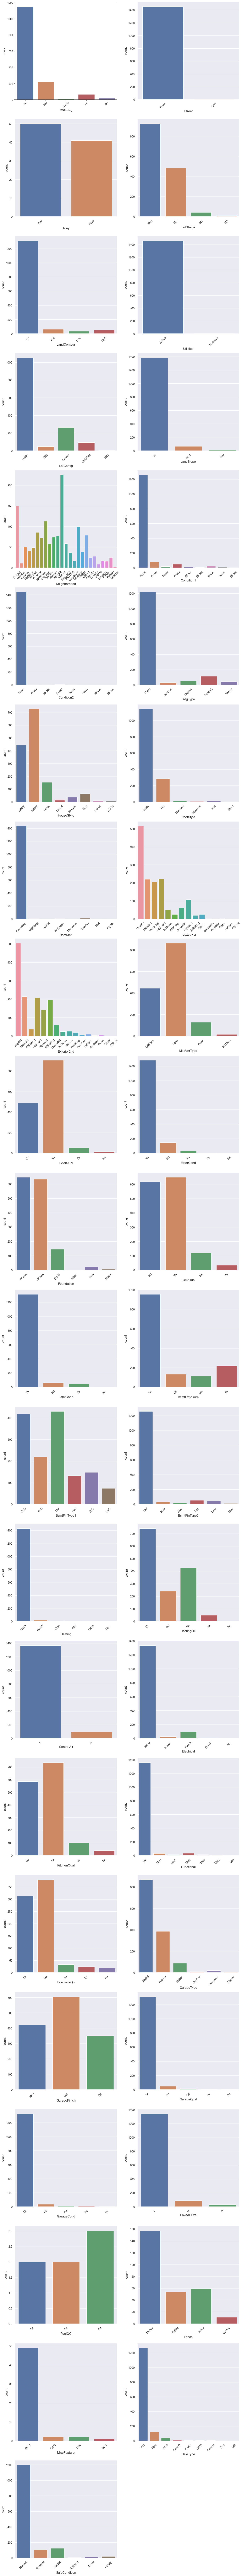

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 180))
for feature in categorical_features:
    plt.subplot(23, 2, categorical_features.index(feature) + 1)
    sns.set(rc={'figure.figsize':(3, 5)})
    sns.countplot(data=dataset, x=feature)
    plt.xticks(rotation=45)

plt.show()

### Observations
    1. Almost all categorical features have imbalance data.
    2. MSZoning, Street, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2,
    BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType,
    ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2,
    Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu,
    GarageType, GarageQual, GarageCond, PavedDrive, Fence, MiscFeature, SaleType,
    SaleCondition. All these features have categories which has less no of observations and hence can be placed in new category called Rare

## 5.3 Categories in Each Feature Vs SalePrice

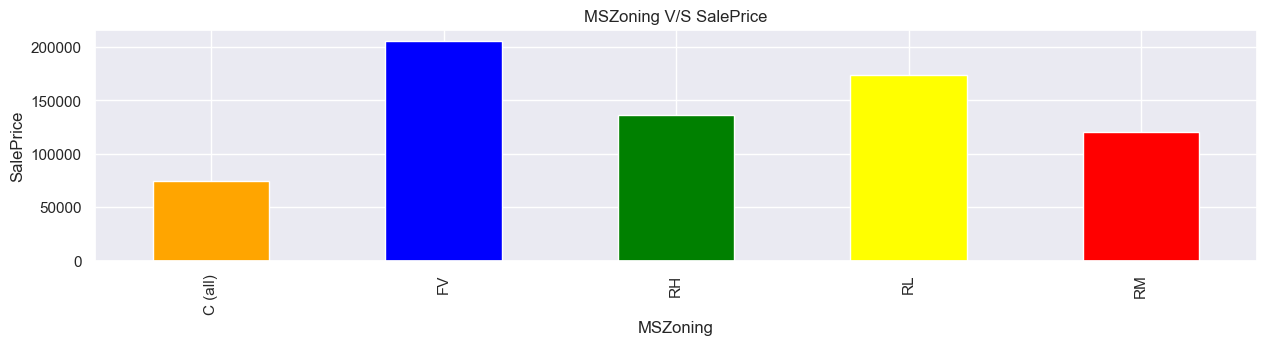

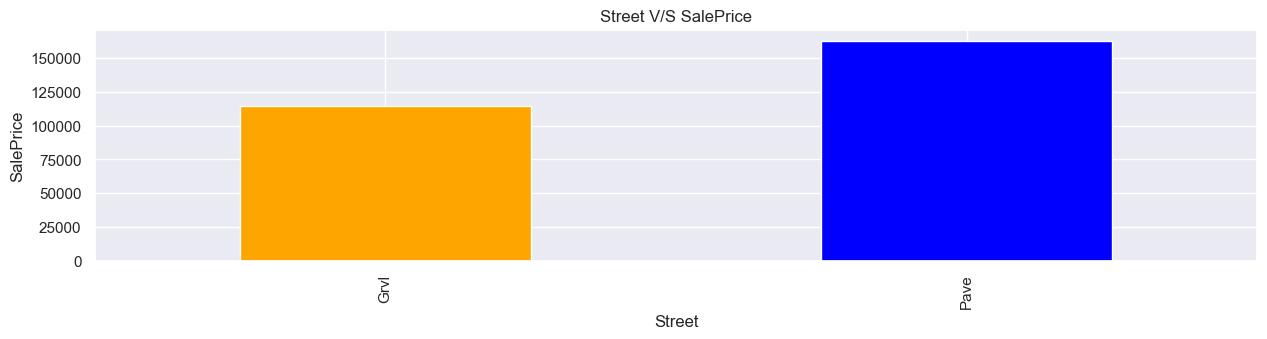

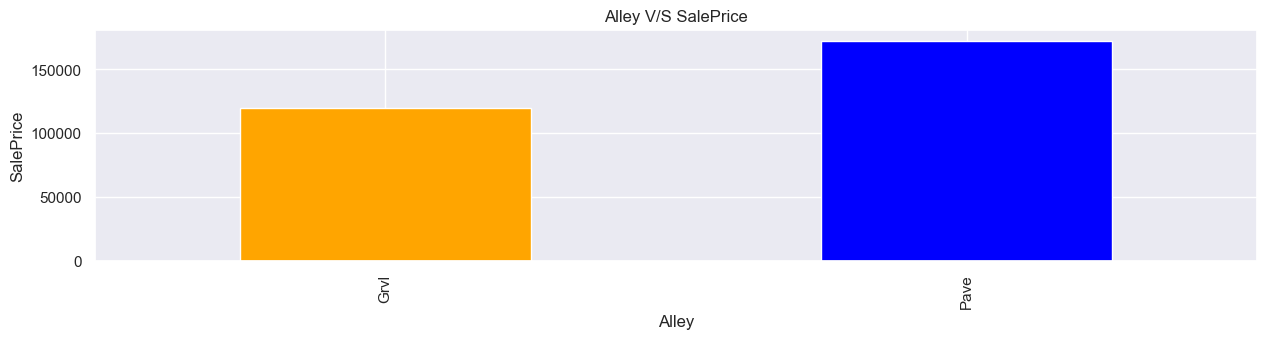

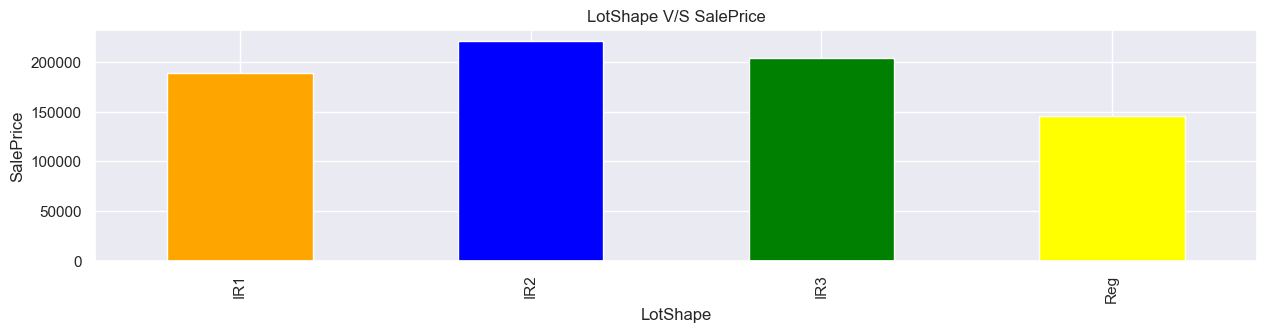

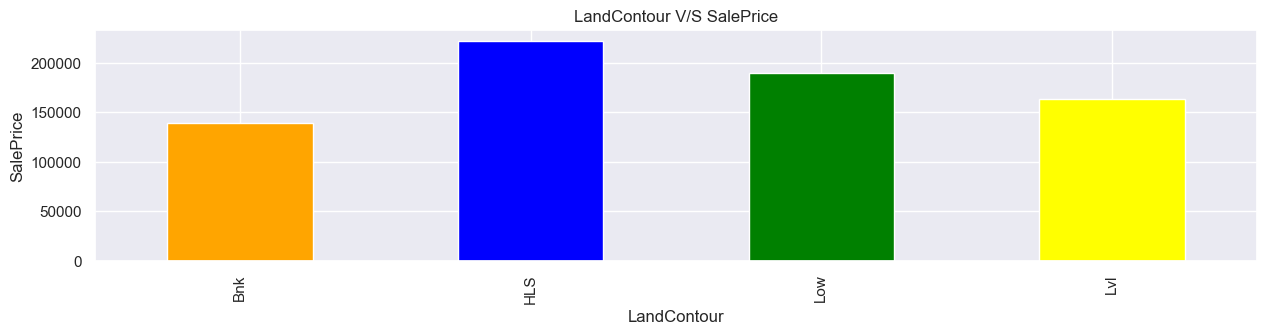

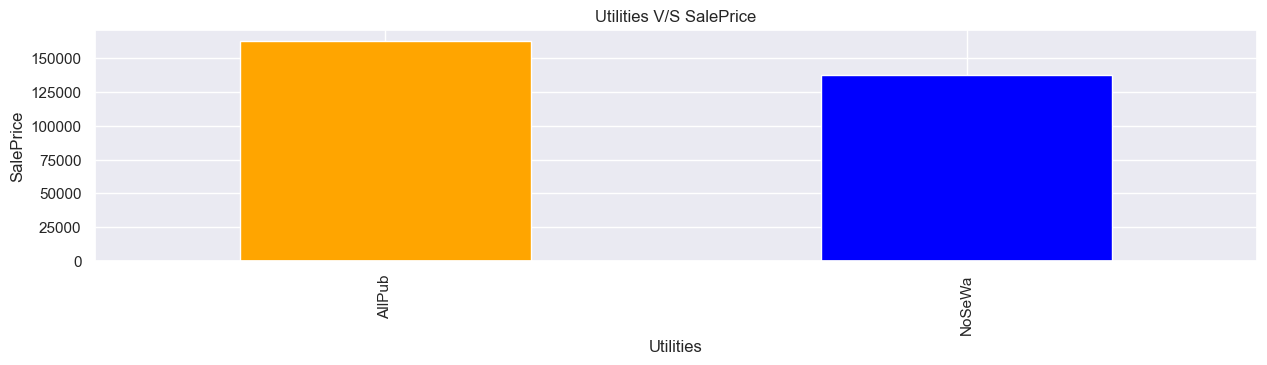

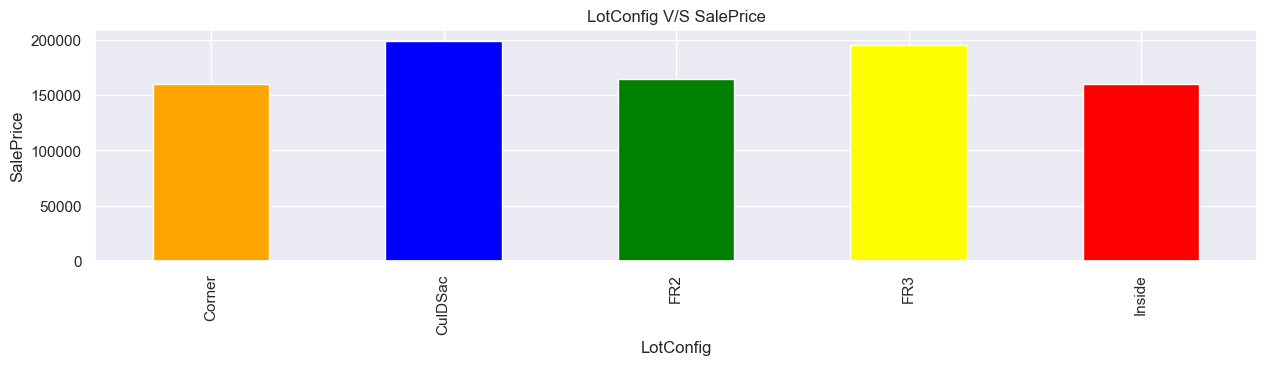

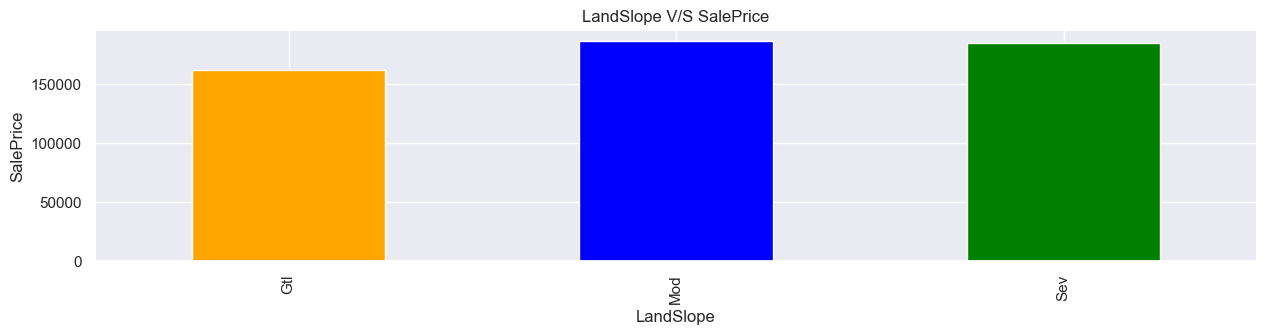

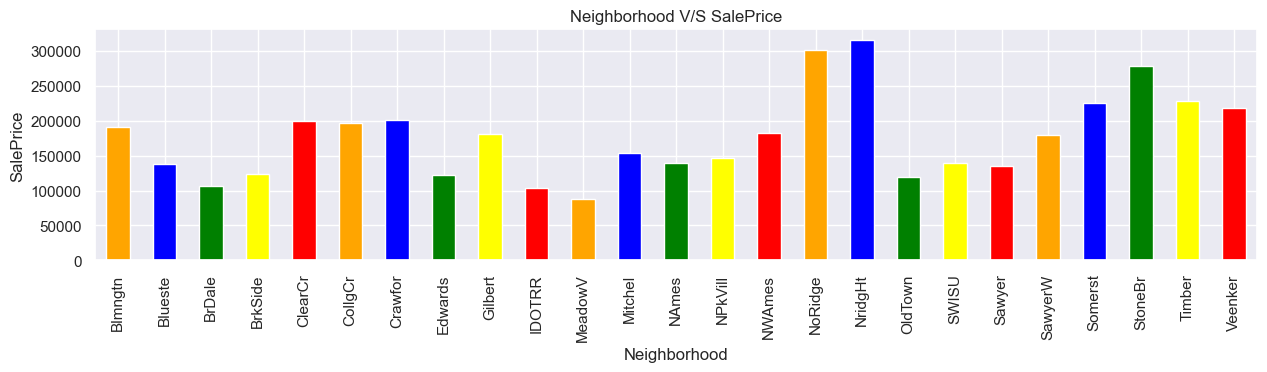

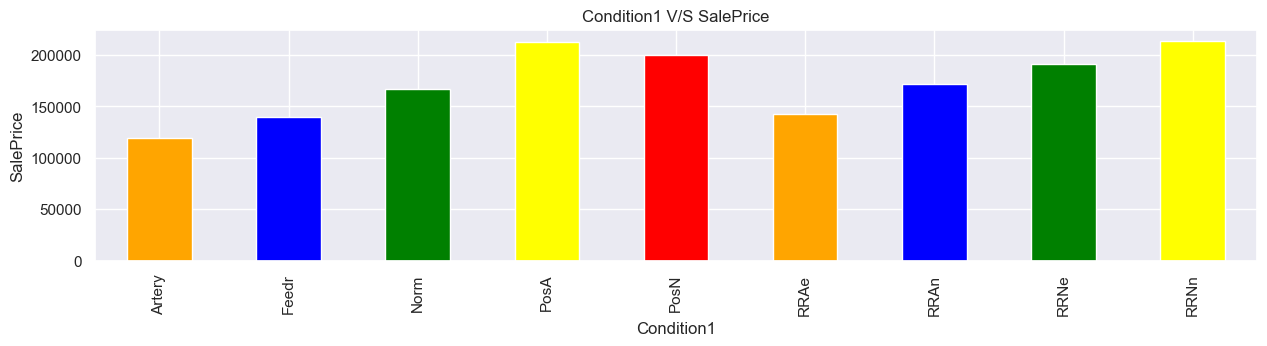

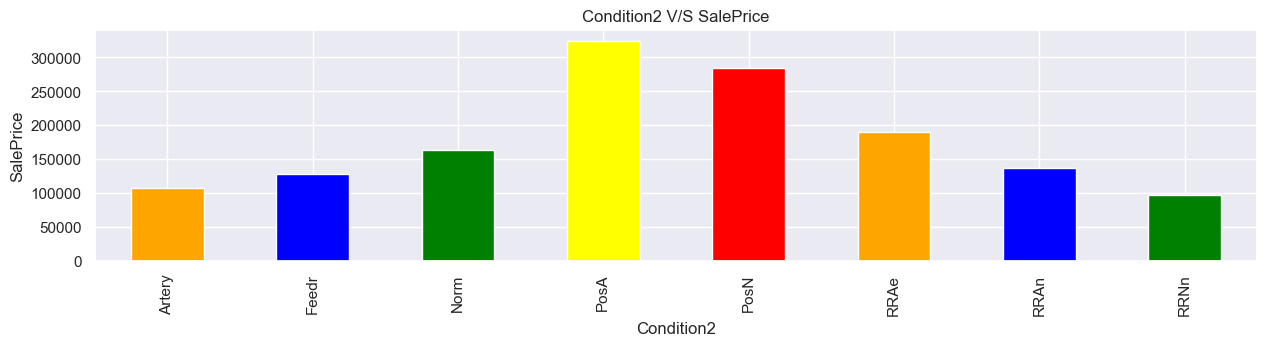

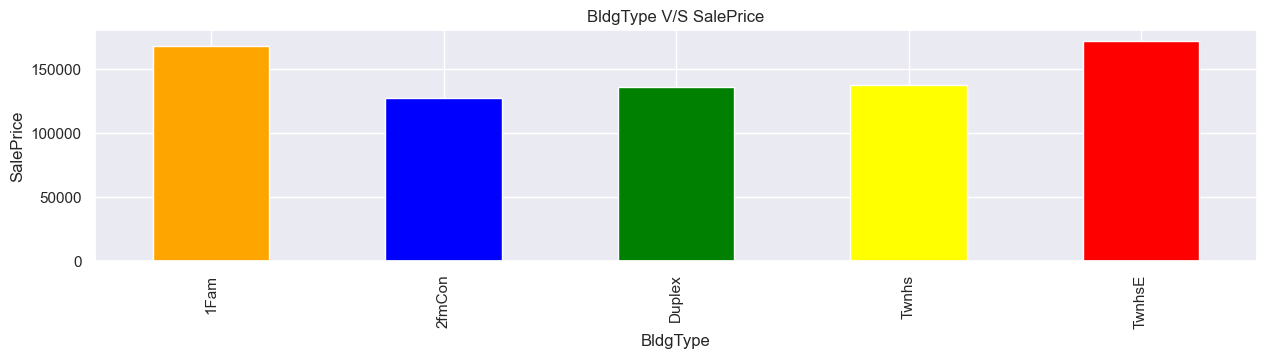

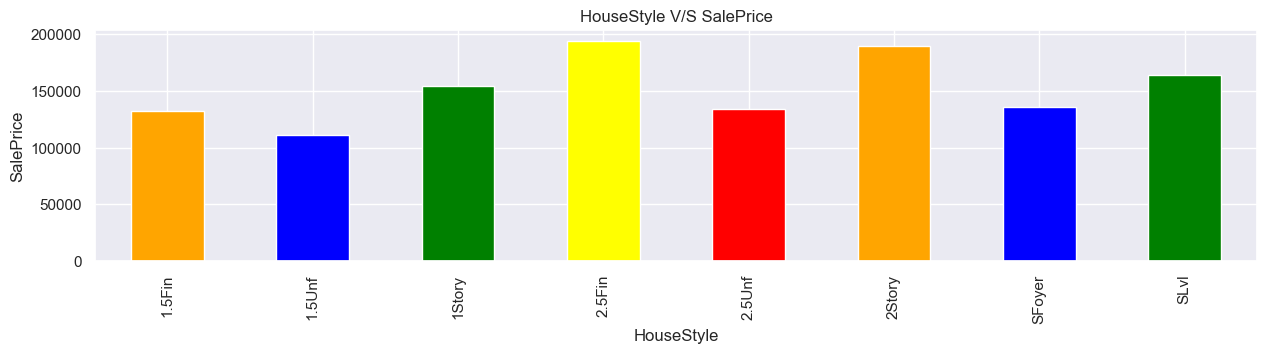

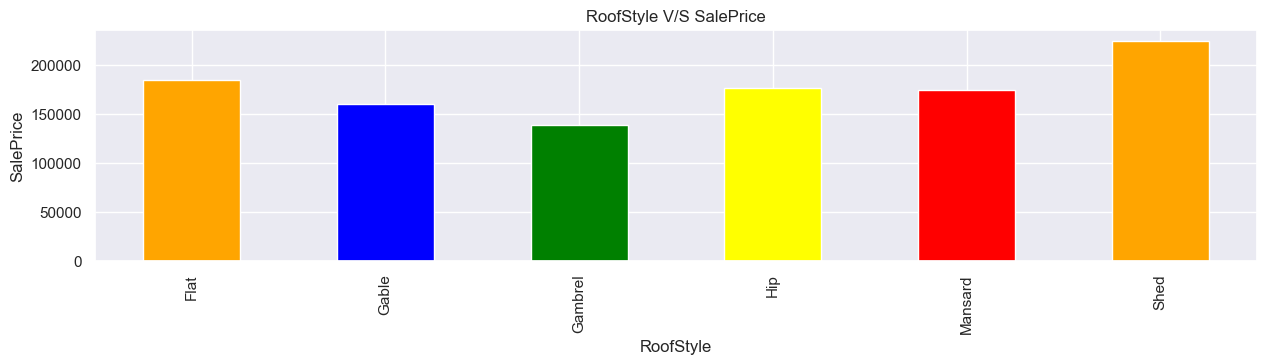

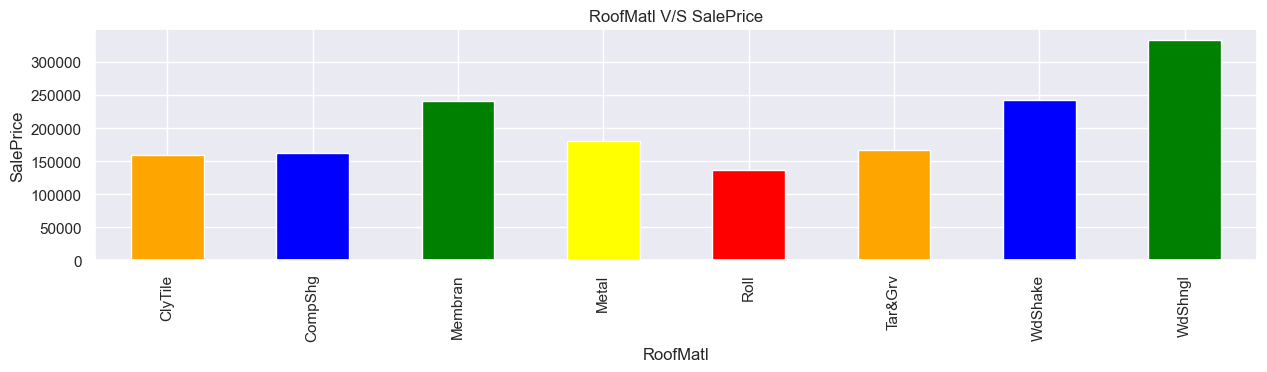

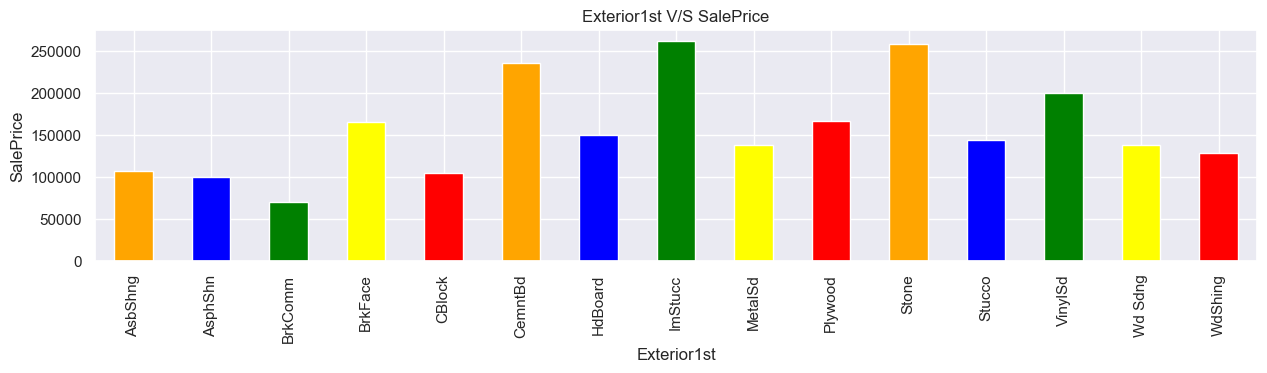

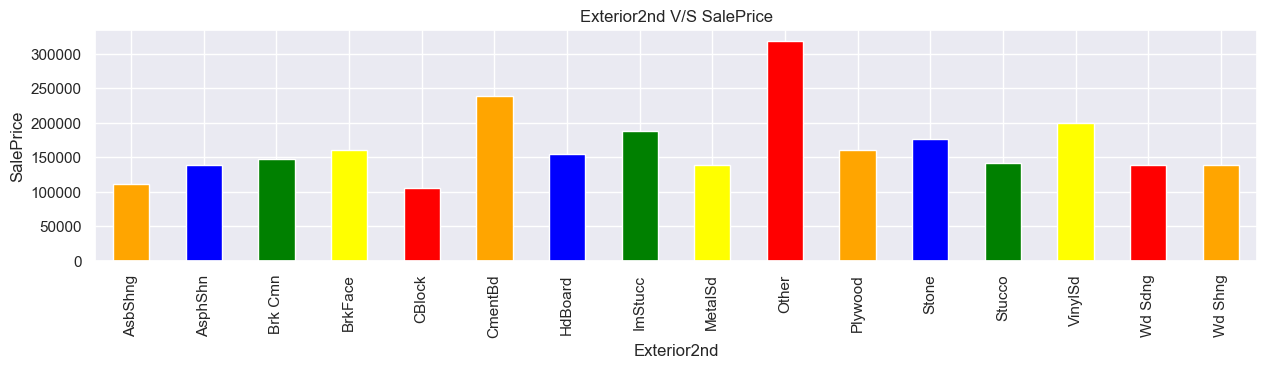

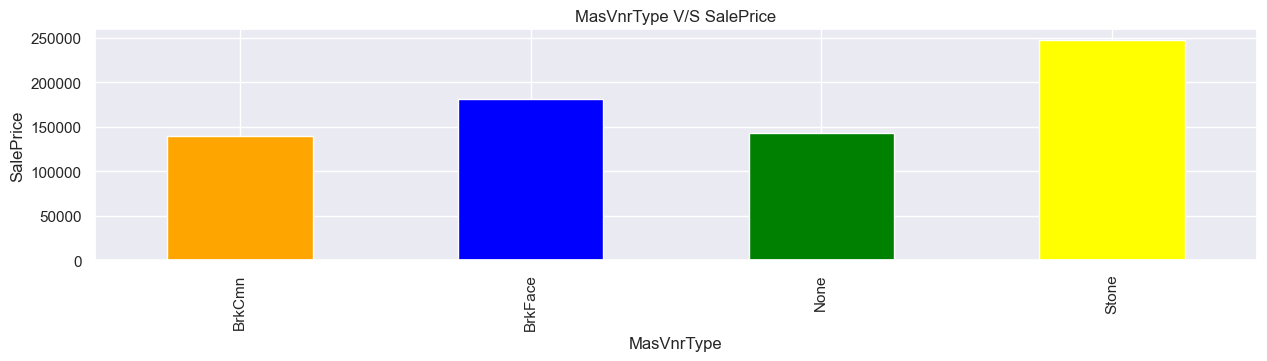

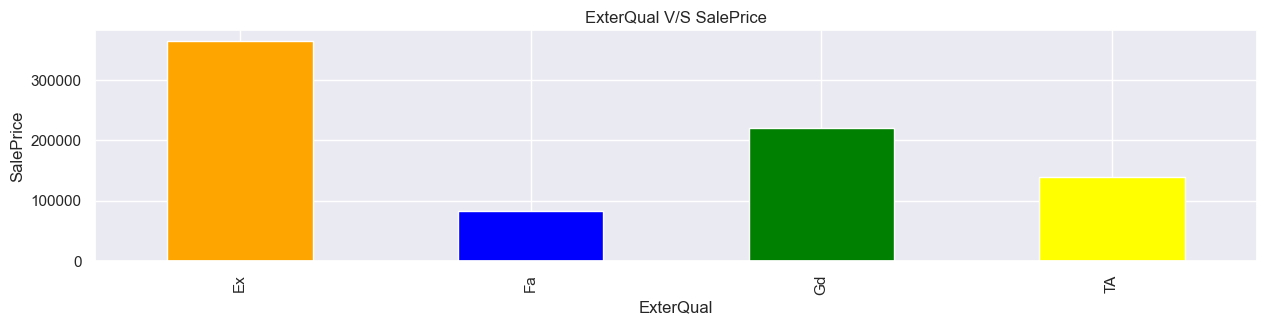

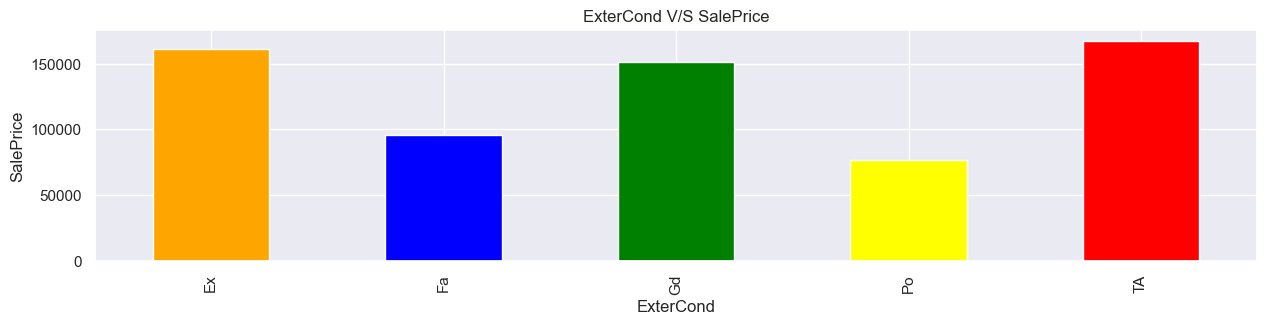

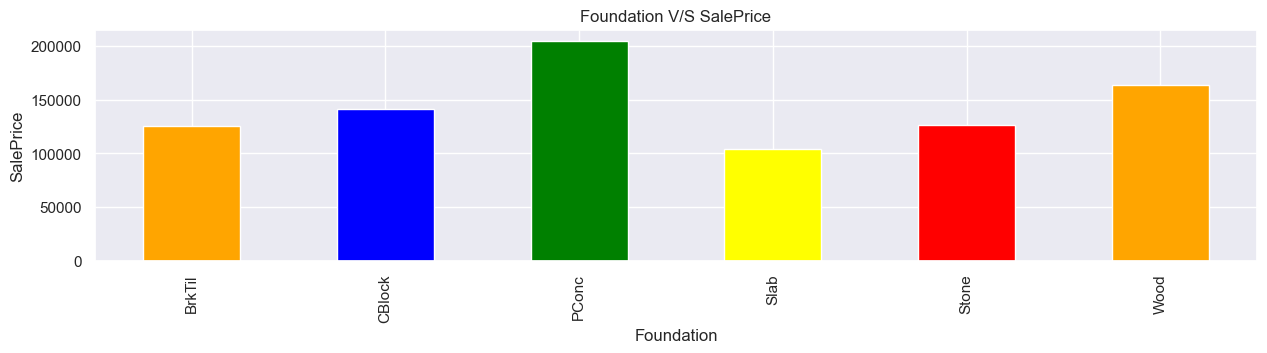

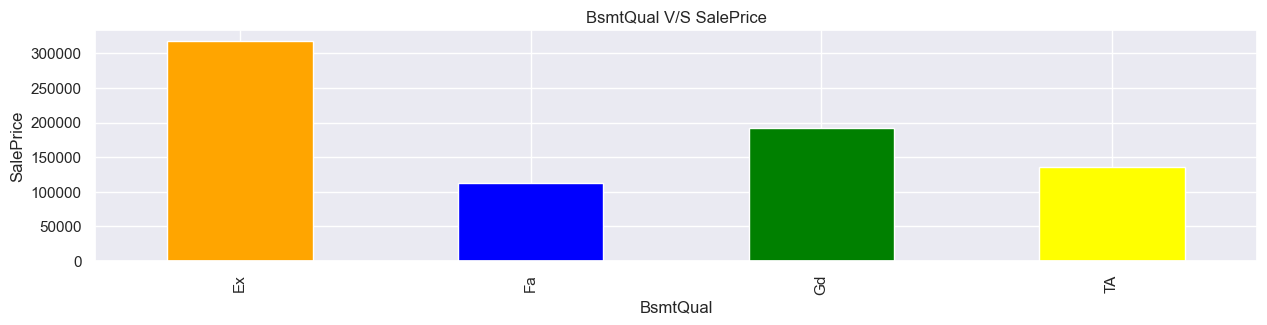

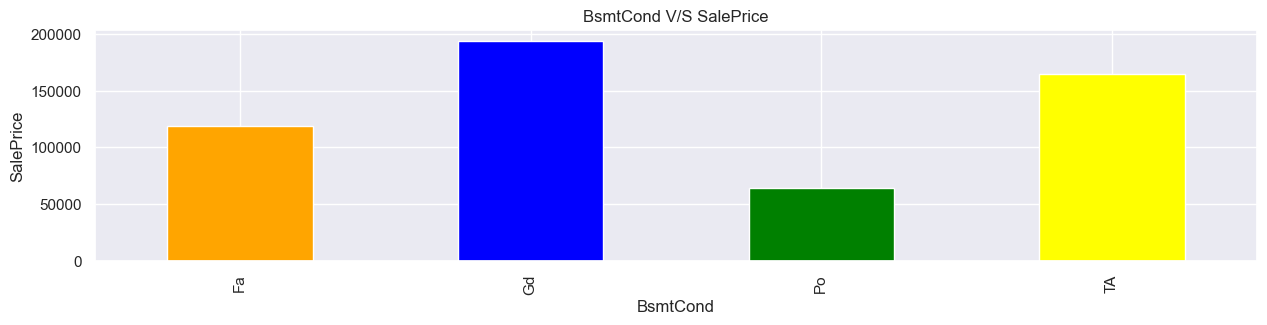

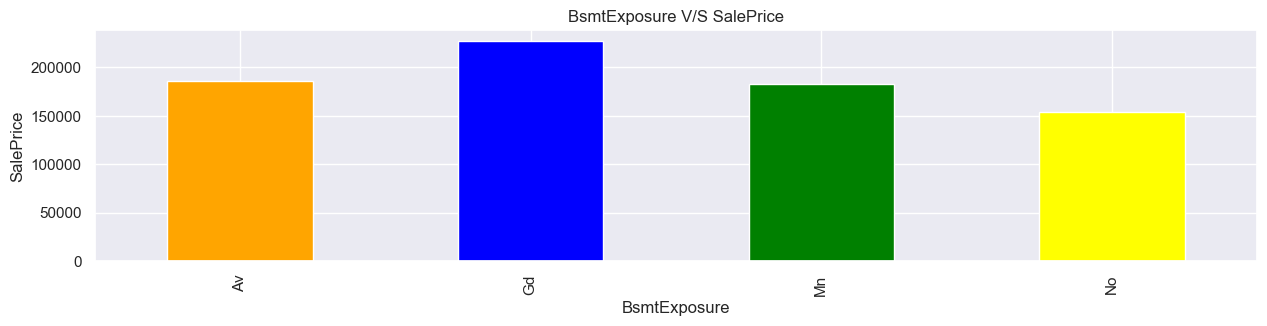

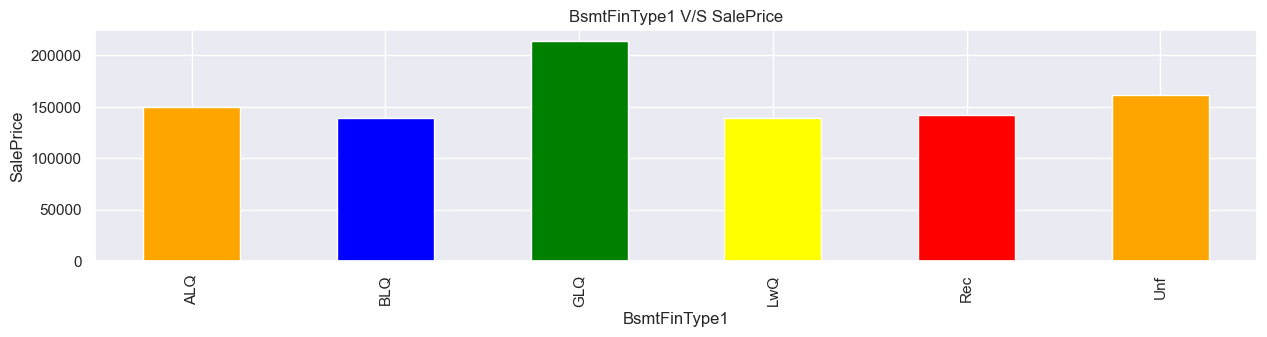

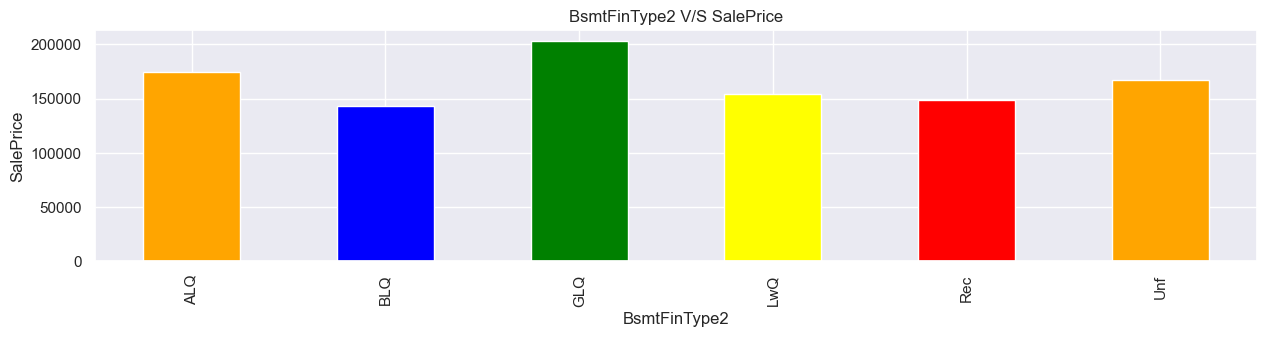

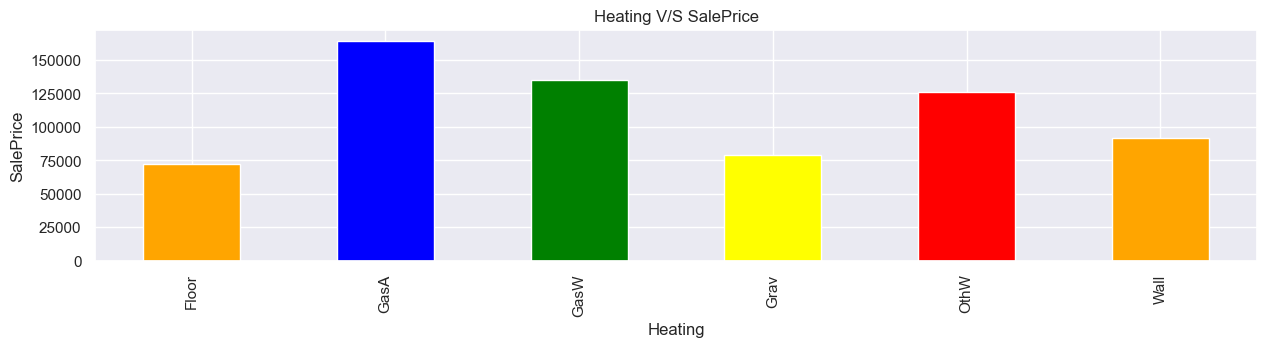

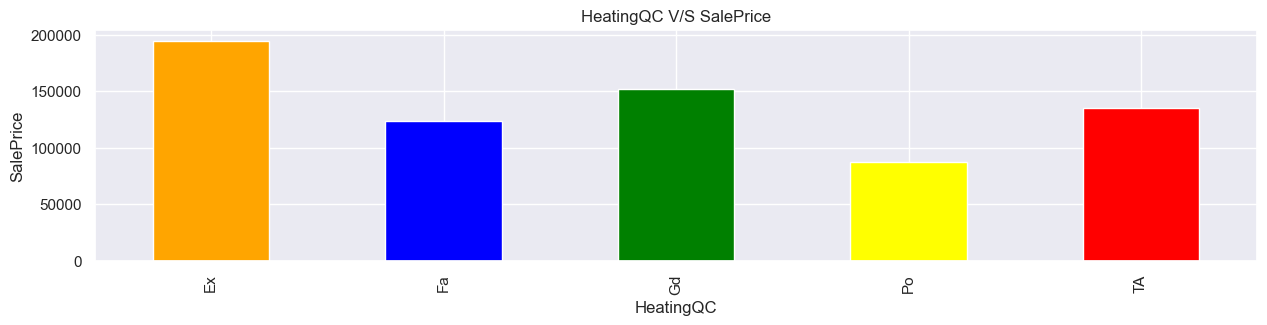

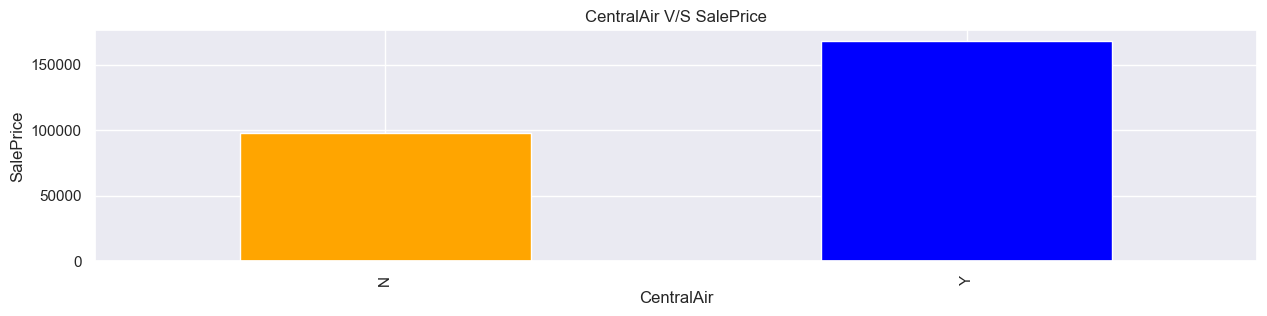

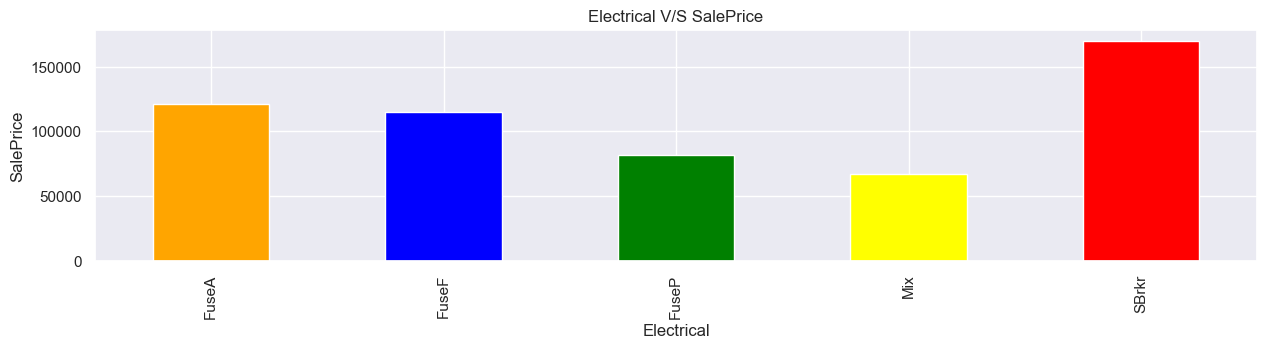

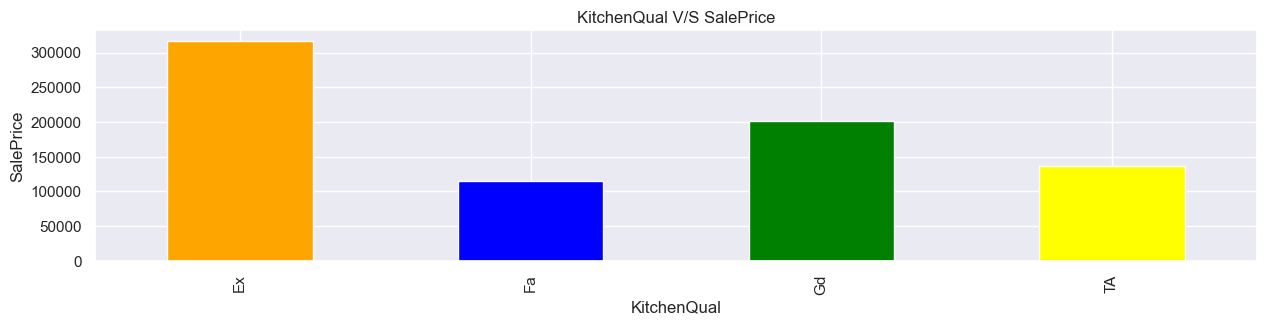

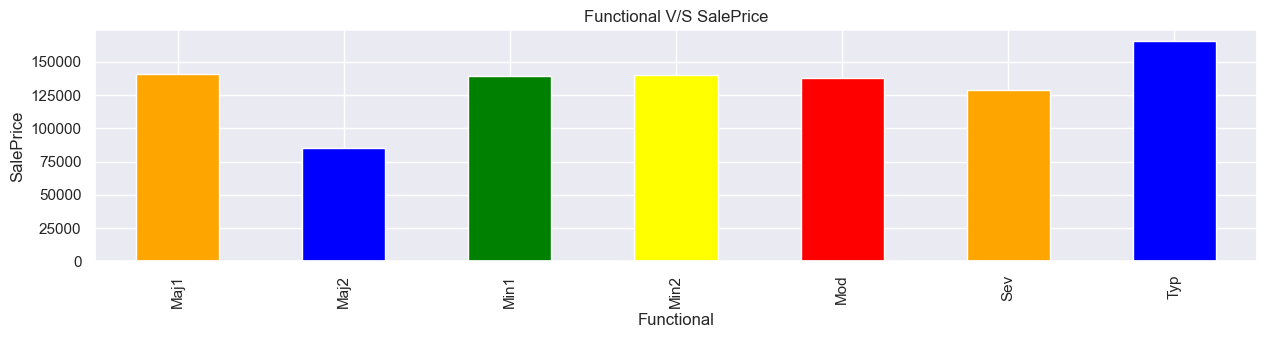

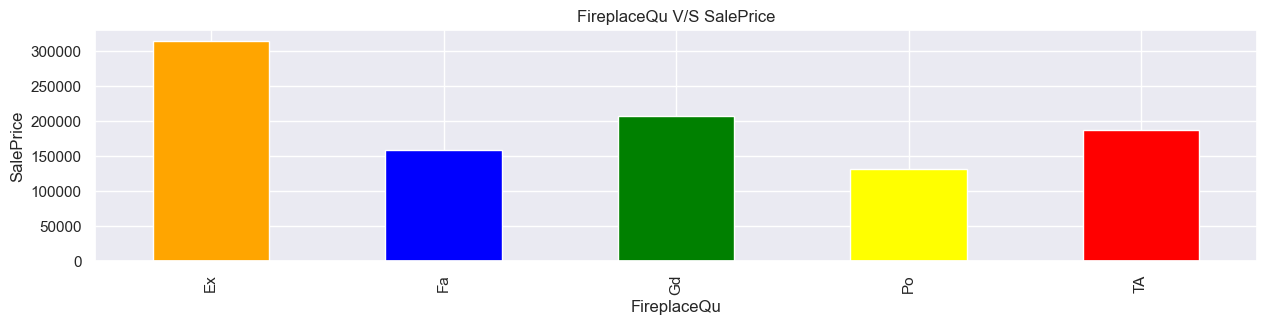

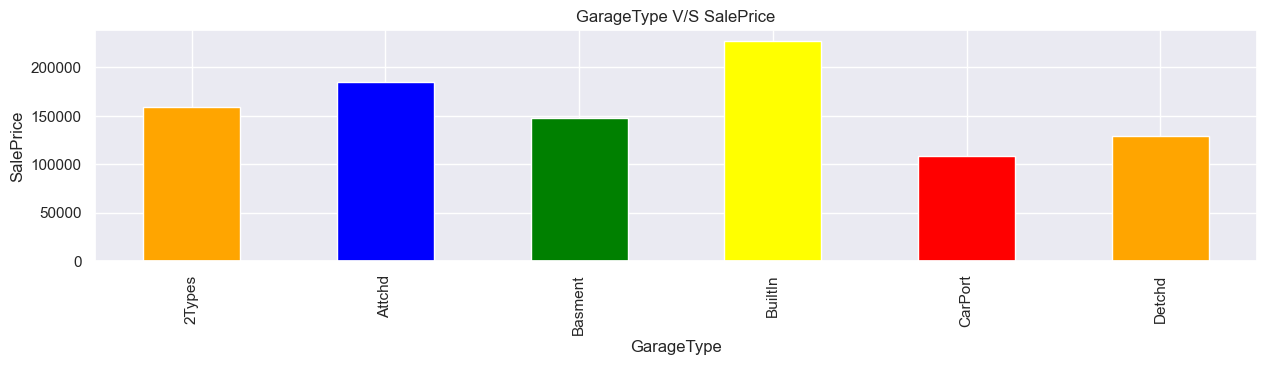

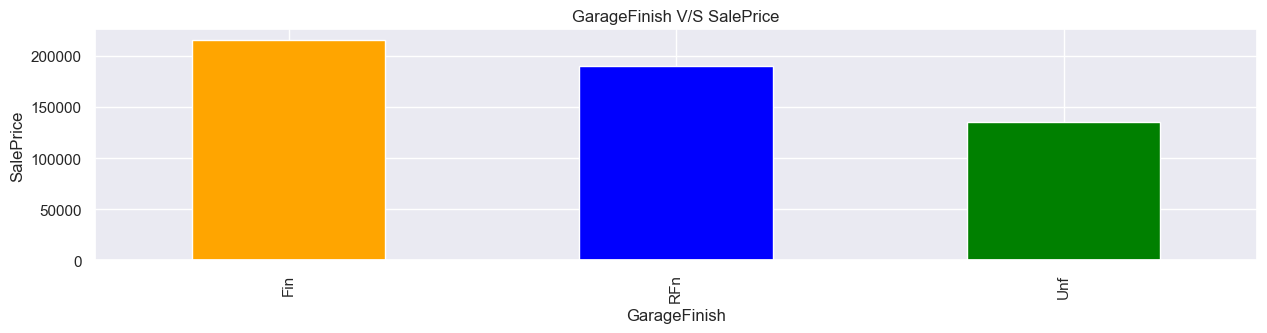

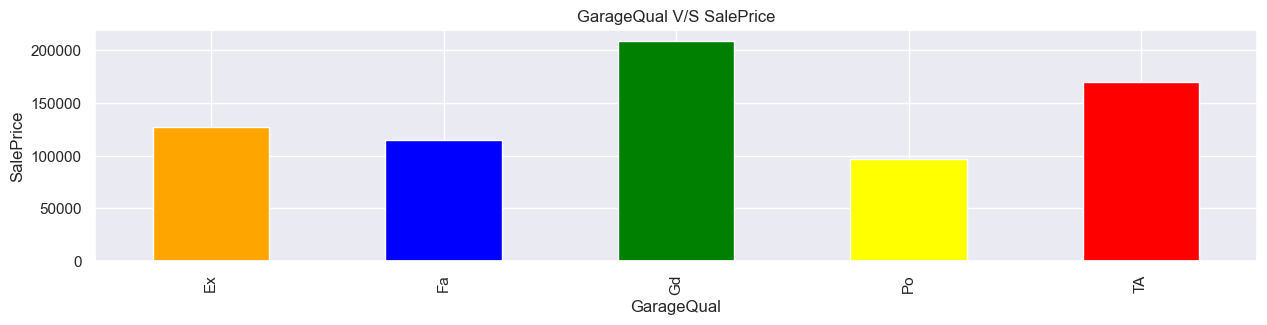

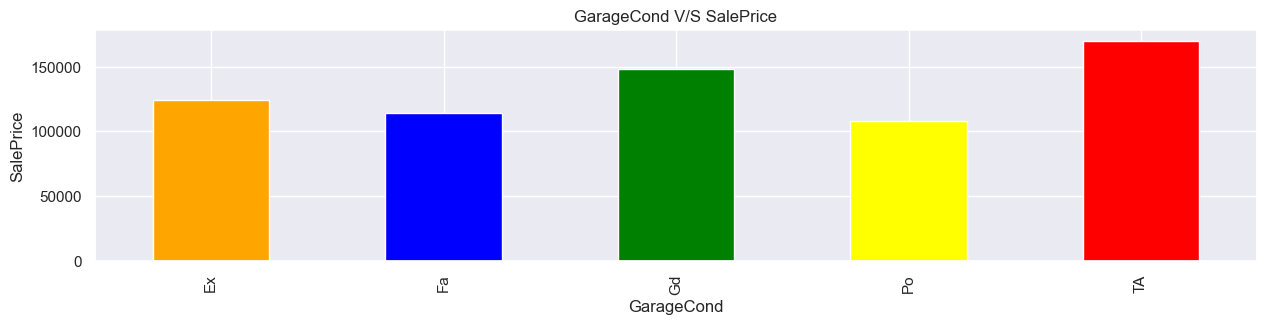

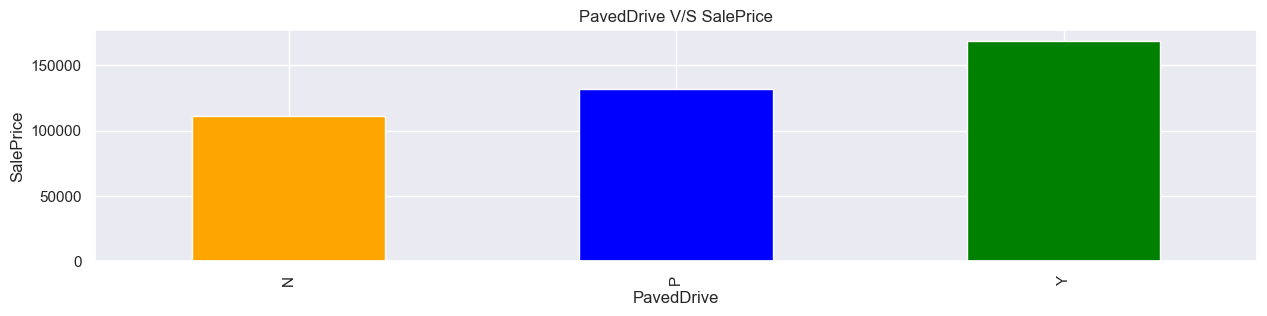

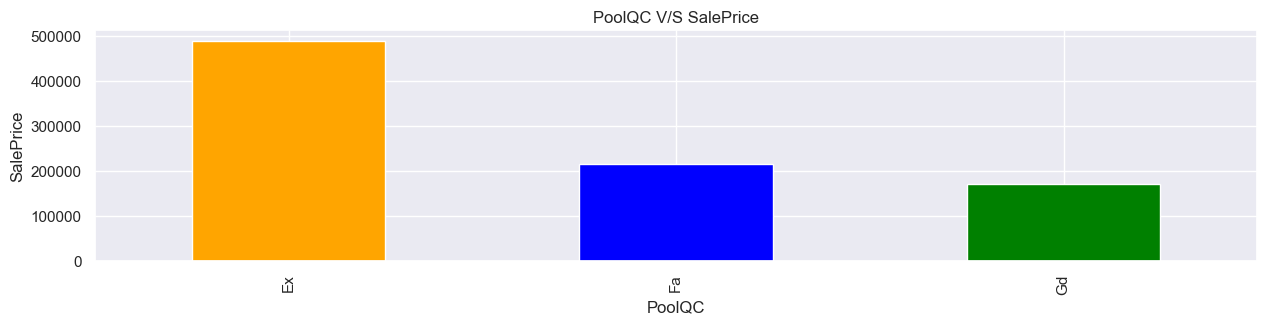

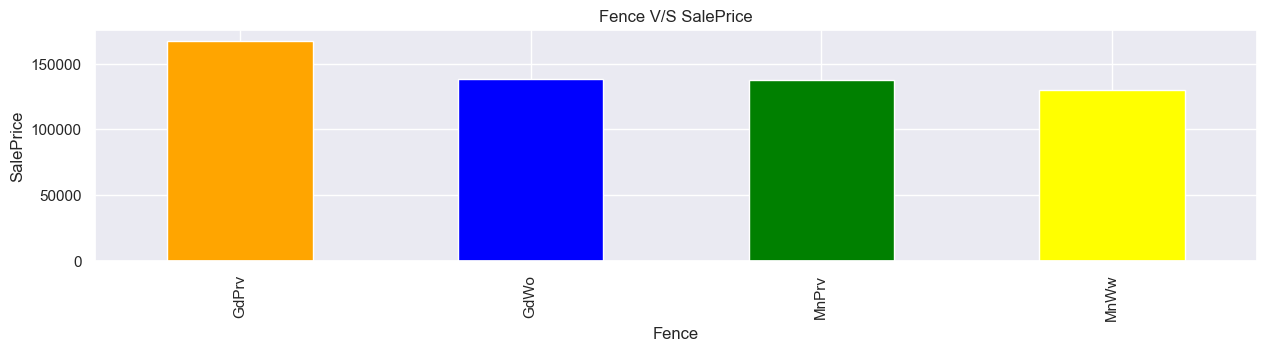

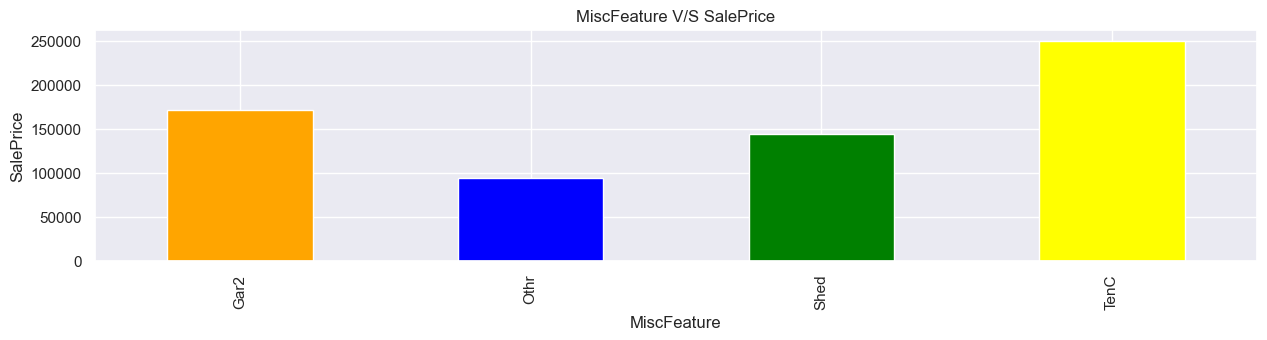

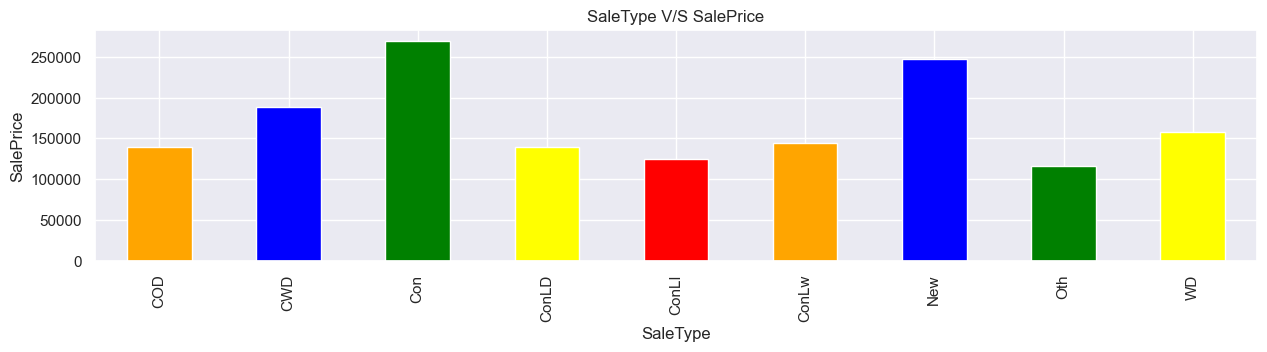

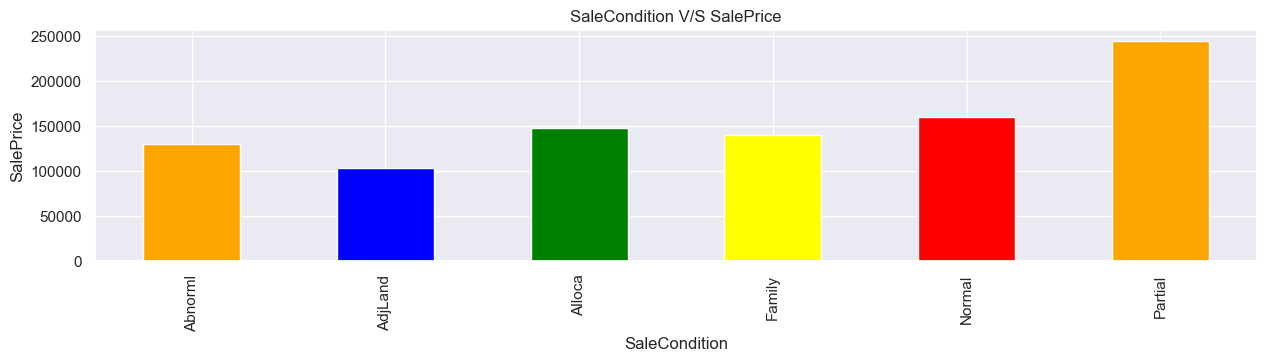

In [12]:

for feature in categorical_features:
    plt.figure(figsize=(15,3))
   # Group the dataset by the current categorical feature and calculate the median SalePrice for each category.
    median_sale_price = dataset.groupby(feature)['SalePrice'].median()
    
    # Create a bar plot to visualize the relationship.
    median_sale_price.plot.bar(color=['orange', 'blue','green','yellow','red'])  # You can specify colors for bars if needed.
    # Set labels and titles for the plot.
    plt.xlabel(feature)  # Set the x-axis label as the current categorical feature.
    plt.ylabel('SalePrice')  # Set the y-axis label as 'SalePrice'.
    plt.title("{} V/S SalePrice".format(feature))  # Set the title based on the current feature.
    # Display the plot for the current feature.
plt.show()

  ## Observations
    1. For MSZoning, Floating Village Residential zone has highest median value whereas
    Commercial has least. Median values for other categories is comparable.
    2. For Street, Paved street has highest median value whereas Gravel street has least.
    3. For alley, Paved alley has highest median value whereas Gravel alley has least.
    4. For LotShape, Moderately Irregular has highest median value whereas Regular has least.
    Median values for other categories is comparable.
    5. For Land Contour, Hillside - Significant slope from side to side has highest median
    value whereas Banked - Quick and significant rise from street grade to building has
    least. Median values for other categories is comparable.
    6. For Utilities, All public Utilities has highest median value whereas Electricity and Gas Only has least.
    7. For LotConfig, Cul-de-sac has highest median value whereas Corner lot has least.
    Median values for other categories is comparable.
    8. For LandSlope, Moderate Slope has highest median value whereas Gentle slope has
    least. Median values for other categories is comparable.
    9. For Neighborhood, Northridge Heights has highest median value whereas Meadow
    Village has least. Median values for other categories is comparable.
    10. For Condition1, Adjacent to postive off-site feature has highest median value whereas
    Adjacent to arterial street has least. Median values for other categories is comparable.
    11. For Condition2, Adjacent to postive off-site feature has highest median value whereas
    Within 200' of North-South Railroad has least. Median values for other categories is comparable.
    12. For BldgType, Townhouse End Unit has highest median value whereas Two-family
    Conversion has least. Median values for other categories is comparable.
    13. For HouseStyle, Two and one-half story: 2nd level finished has highest median value
    whereas One and one-half story: 2nd level unfinished has least. Median values for other categories is comparable.
    14. For RoofStyle, Floating Village Residential zone has highest median value whereas
    Commercial has least. Median values for other categories is comparable.
    15. For RoofStyle, Shed has highest median value whereas Gabrel (Barn) has least. Median
    values for other categories is comparable.
    16. For RoofMatl, Wood Shingles has highest median value whereas Roll has least. Median
    values for other categories is comparable.
    17. For Exterior1st, Imitation Stucco has highest median value whereas Brick Common has
    least. Median values for other categories is comparable.
    18. For Exterior2nd, Other has highest median value whereas Cinder Block has least.
    Median values for other categories is comparable.
    19. For MasVnrType, Stone has highest median value whereas Brick Common has least.
    Median values for other categories is comparable.
    20. For ExterQual, Excellent has highest median value whereas Fair has least. Median values
    for other categories is comparable.
    21. For ExterCond, Average/Typical has highest median value whereas Poor has least.
    Median values for other categories is comparable.
    22. For Foundation, Poured Contrete has highest median value whereas Slab has least.
    Median values for other categories is comparable.
    23. For BsmtQual, Excellent (100+ inches) has highest median value whereas Fair (70-79
    inches) has least. Median values for other categories is comparable.
    24. For BsmtCond, Good has highest median value whereas Poor - Severe cracking, settling,
    or wetness has least. Median values for other categories is comparable.
    25. For BsmtExposure, Good Exposure has highest median value whereas No Exposure has
    least. Median values for other categories is comparable.
    26. For Heating, Gas forced warm air furnace has highest median value whereas Floor
    Furnace has least. Median values for other categories is comparable.
    27. For CentralAir, Yes has highest median value whereas No has least. Median values for other categories is comparable.
    28. For Electrical, Standard Circuit Breakers & Romex has highest median value whereas
    Mixed has least. Median values for other categories is comparable.
    29. For KitchenQual, Excellent has highest median value whereas Fair has least. Median
    values for other categories is comparable.
    30. For Functional, Typical Functionality has highest median value whereas Major
    Deductions 2 has least. Median values for other categories is comparable.
    31. For GarageType, Built-In has highest median value whereas Car Port has least. Median
    values for other categories is comparable.
    32. For PavedDrive, Partial Pavement has highest median value whereas Dirt/Gravel has
    least. Median values for other categories is comparable.
    33. For PoolQC, Excellent has highest median value whereas Good has least. Median values
    for other categories is comparable.
    34. For Fence, Good Privacy has highest median value whereas Minimum Wood/Wire has
    least. Median values for other categories is comparable.
    35. For MiscFeature, Tennis Court has highest median value whereas Other has least.
    Median values for other categories is comparable.
    36. For SaleType, Contract 15% Down payment regular terms has highest median value
    whereas Other has least. Median values for other categories is comparable.
    37. For SaleCondition, Home was not completed when last assessed (associated with New
    Homes) has highest median value whereas Allocation - two linked properties with
    separate deeds, typically condo with a garage unit has least. Median values for other
    categories is comparable.


In [47]:
# Getting numerical features excluding datetime features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'datetime64[ns]' and dataset[feature].dtype !='object' ]

# Getting datetime features
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

# Print the length of numerical features
print(len(numerical_features))
print(year_feature)

38
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


## 6.1 Checking Distribution of numerical features

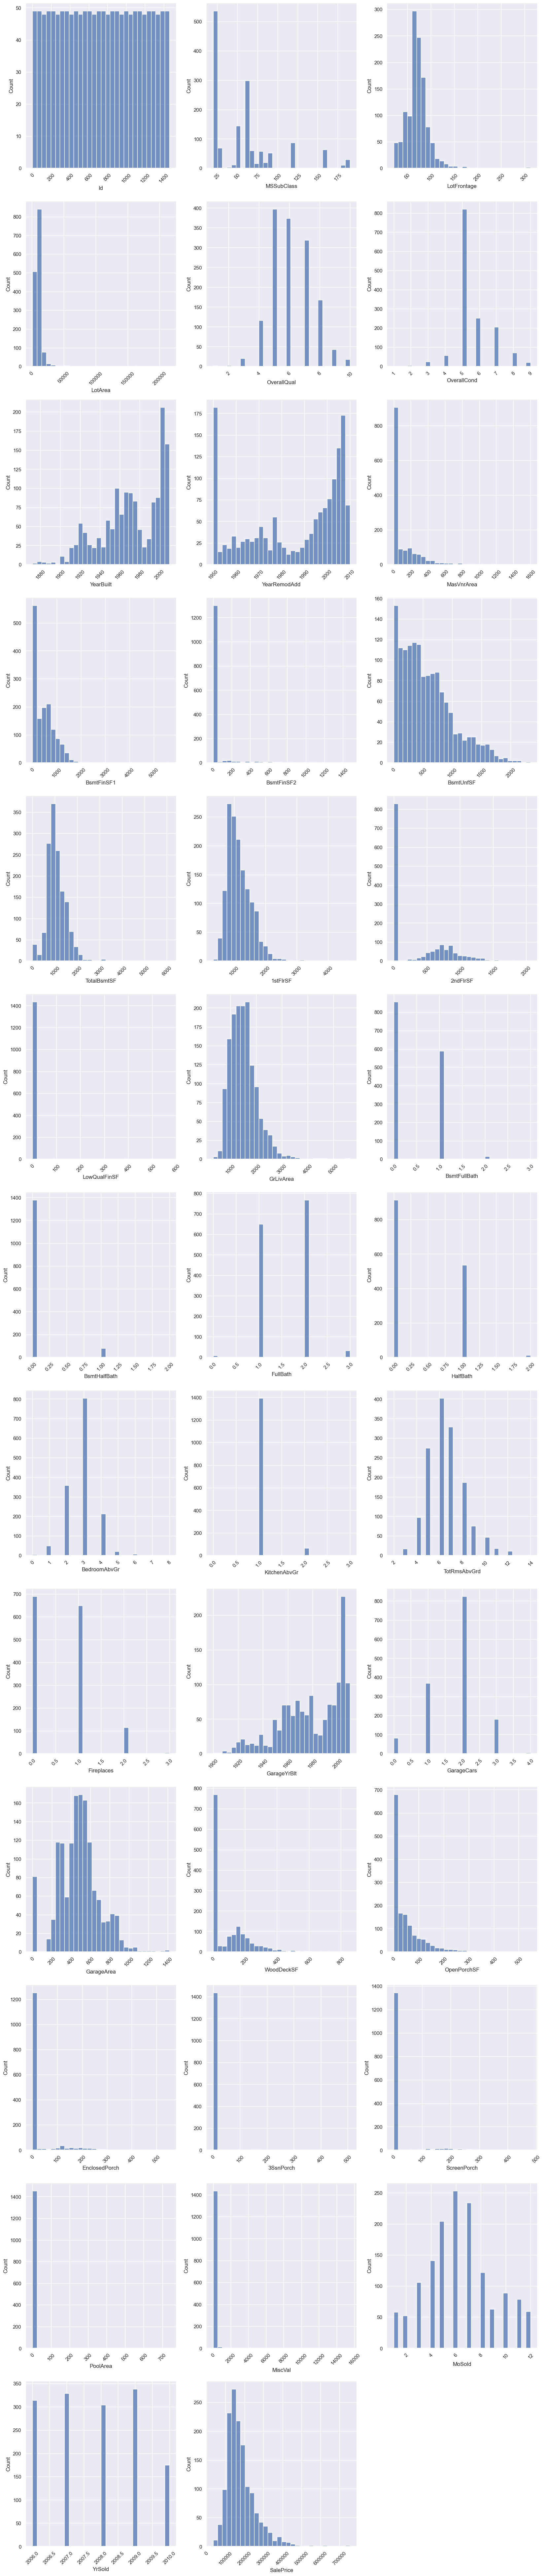

In [20]:
plt.figure(figsize=(20,100))
for i in enumerate(numerical_features):
 plt.subplot(13, 3, i[0]+1)
 sns.set(rc={'figure.figsize':(5,5)})
 sns.histplot(data=dataset, x=i[1], bins=30)
 plt.xticks(rotation=45)


### Observation
1. Numerical feature contains discreate as well as continuous features
2. Also datetime features are there in the numerical features

## 6.2 Discrete and Continuous numerical features

In [66]:
# Get numerical features
numerical_features = dataset.select_dtypes(include=[np.number])

# Find discrete features (features with a small number of unique values)
discrete_features = [feature for feature in numerical_features.columns if len(dataset[feature].unique()) < 21 and feature not in year_feature]  # Adjust the threshold as needed

# Find continuous features (features not in discrete_features and not in year_feature)
continuous_features = [feature for feature in numerical_features.columns if feature not in discrete_features and feature not in year_feature and feature not in ['Id','SalePrice']] 

print("There are a total of {} discrete features, namely: {}".format(len(discrete_features), discrete_features))
print("There are a total of {} continuous features, namely: {}".format(len(continuous_features), continuous_features))


There are a total of 15 discrete features, namely: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
There are a total of 17 continuous features, namely: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']


## 6.3 Relationship between discrete feature and SalePrice

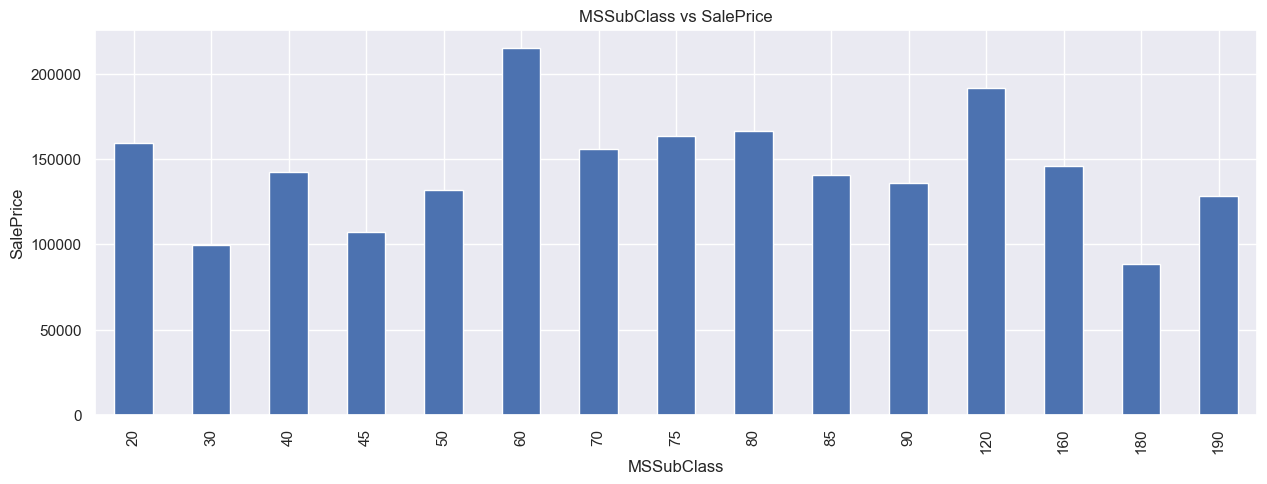

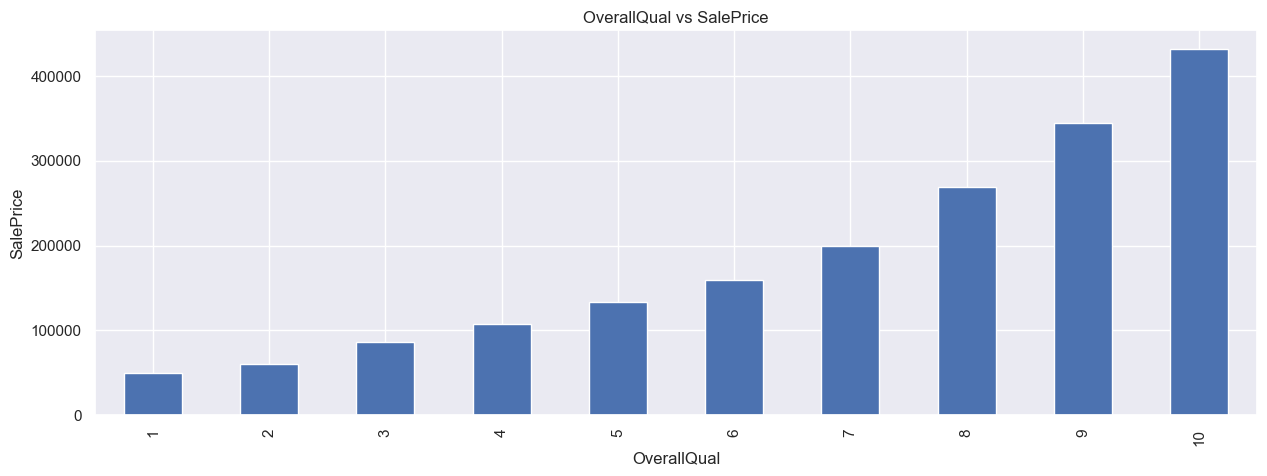

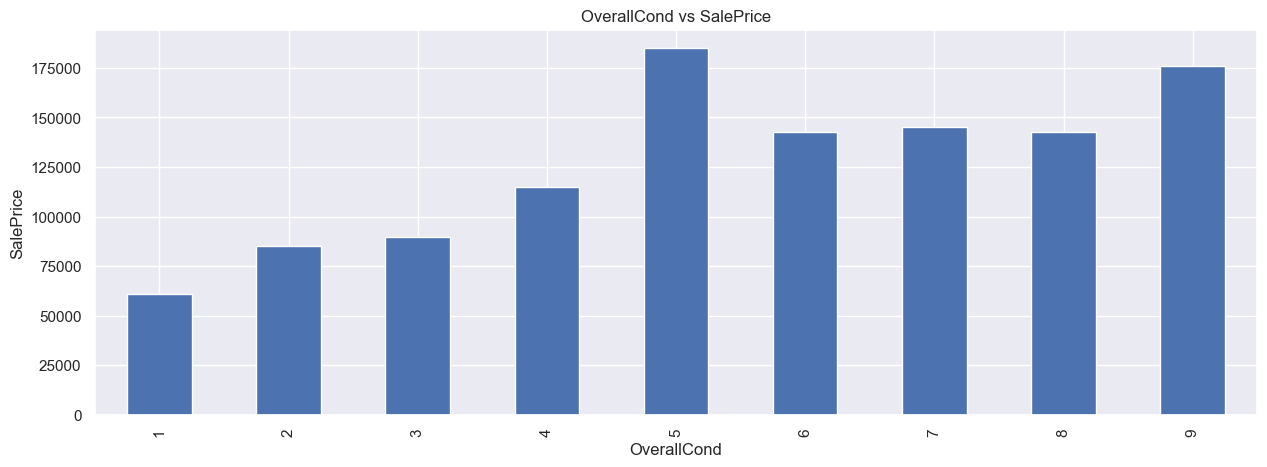

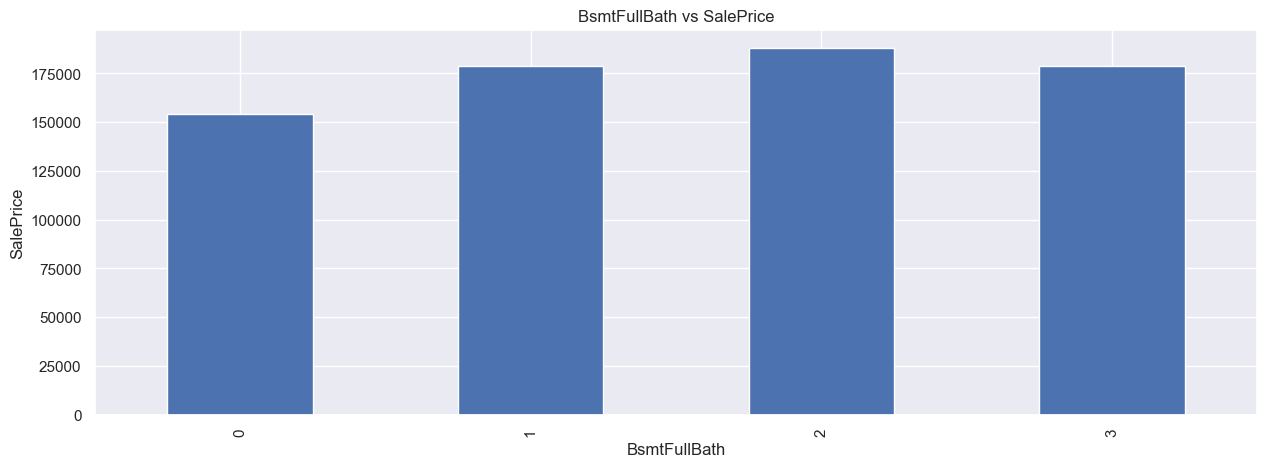

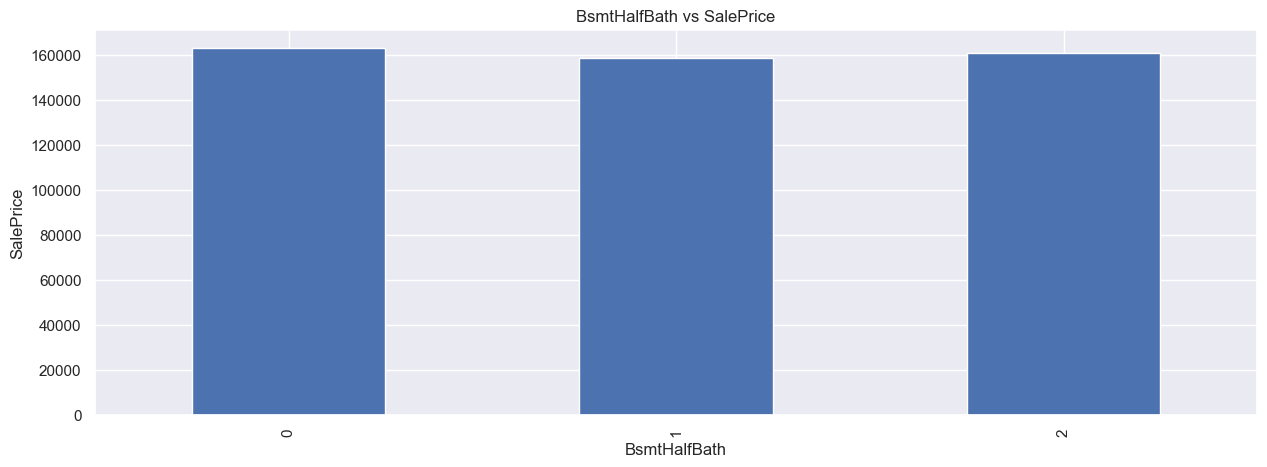

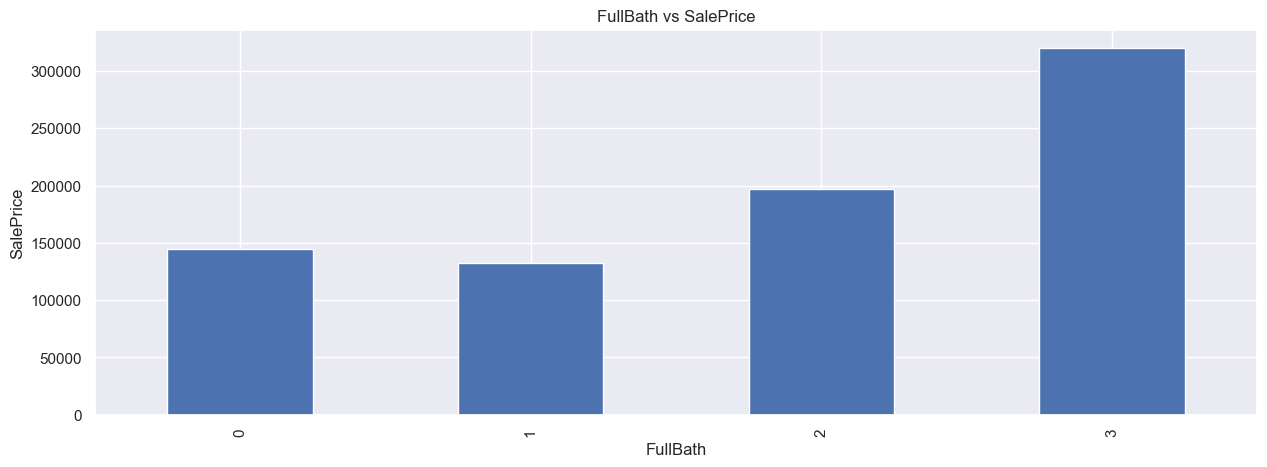

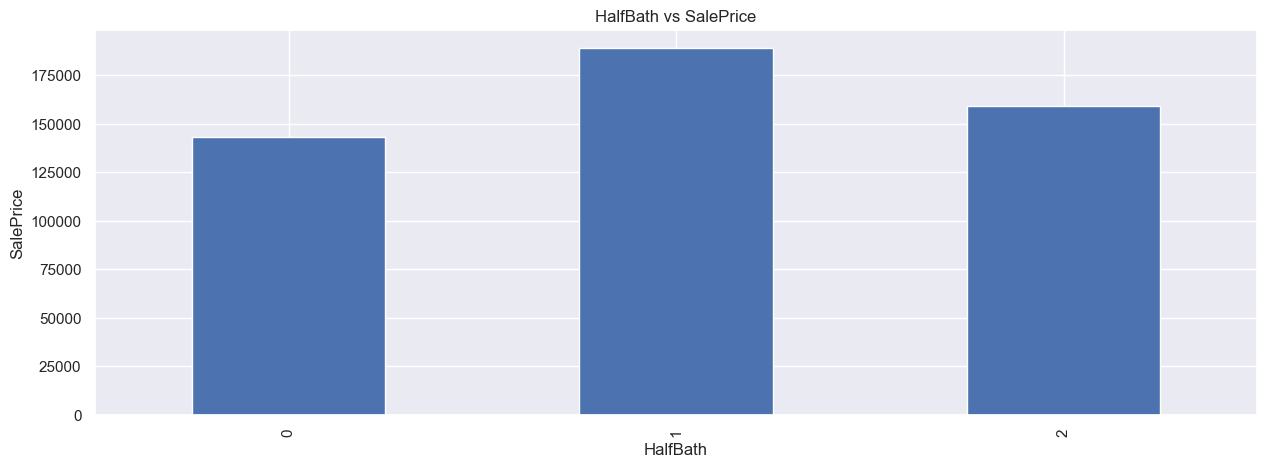

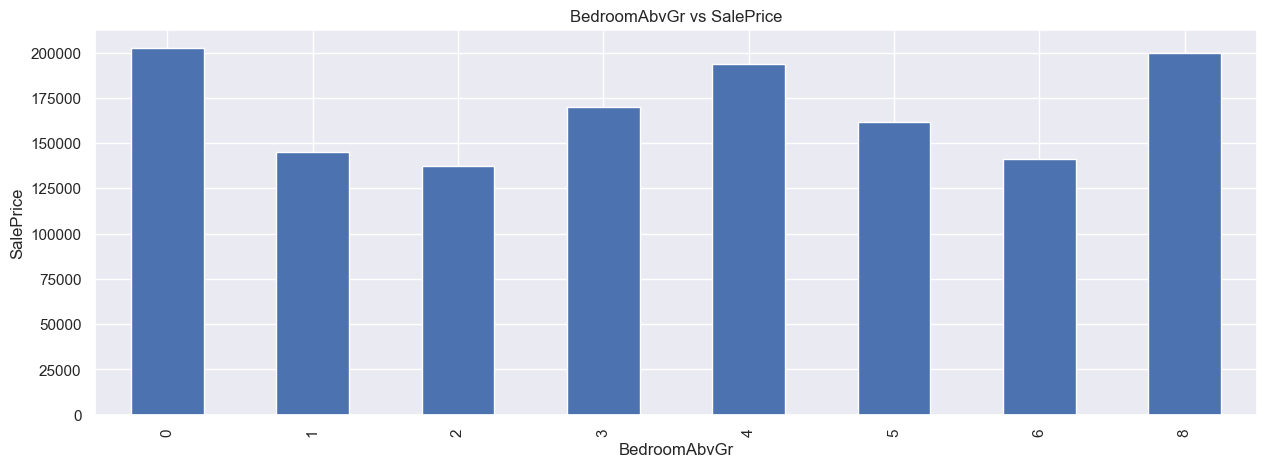

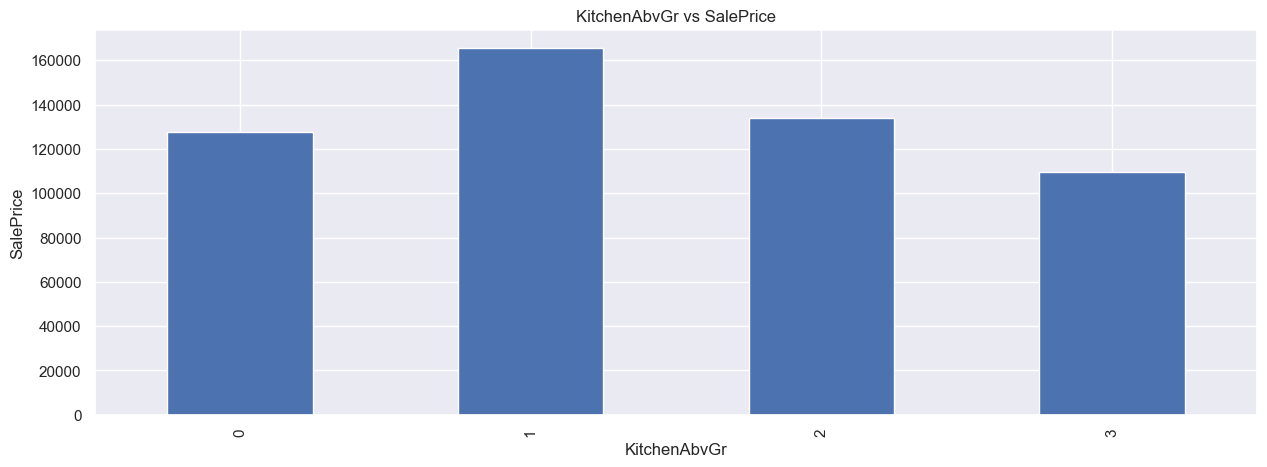

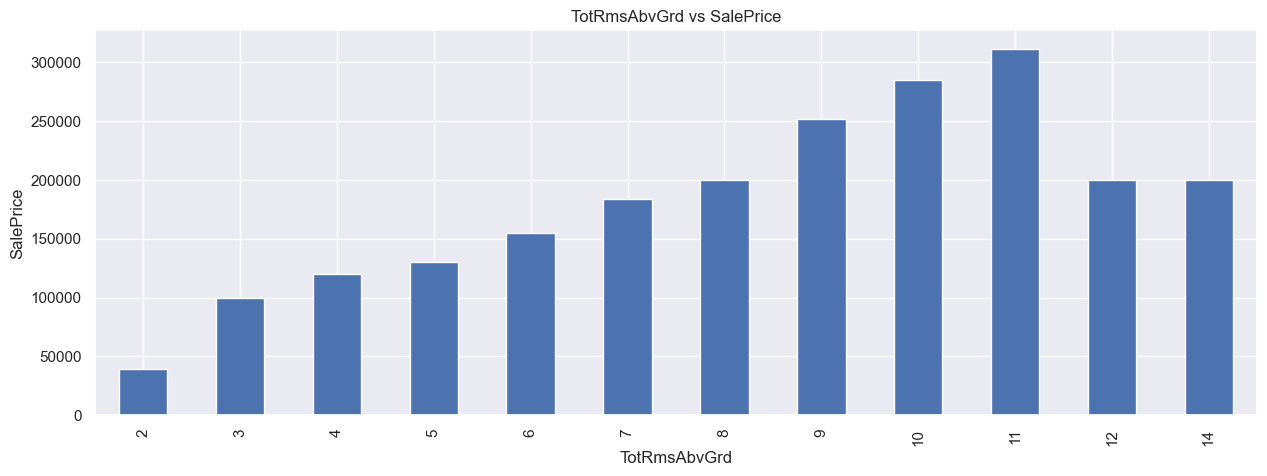

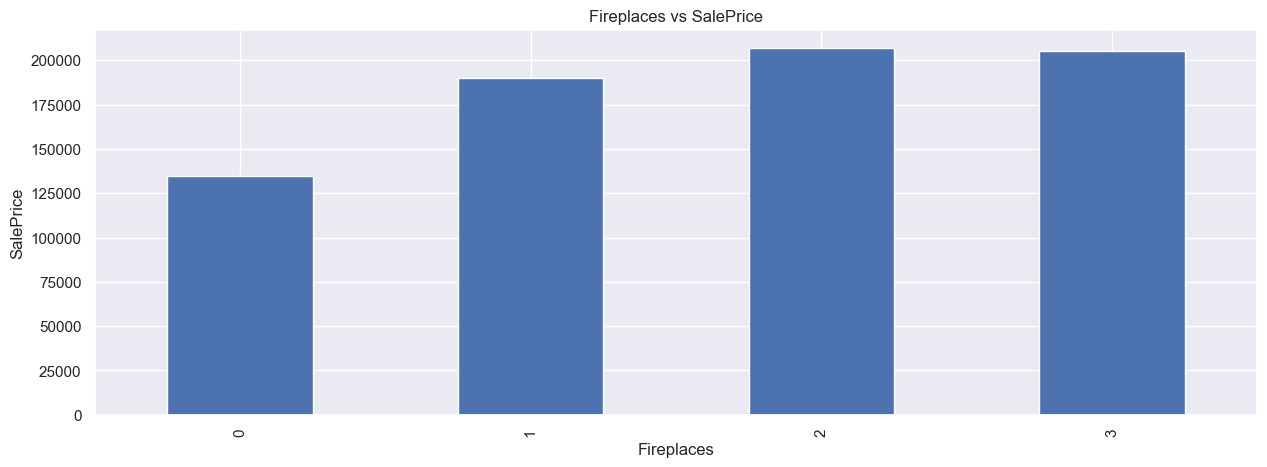

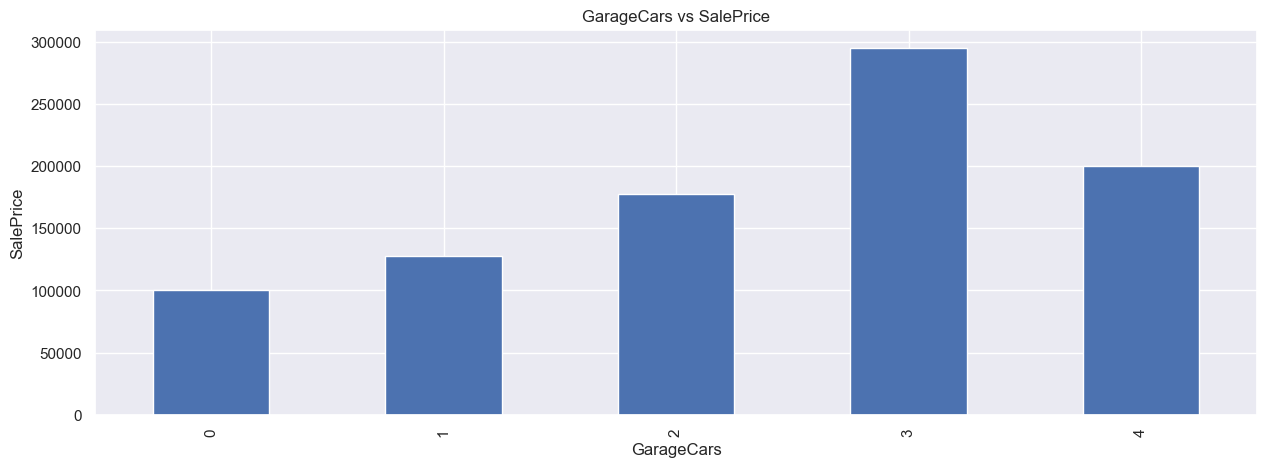

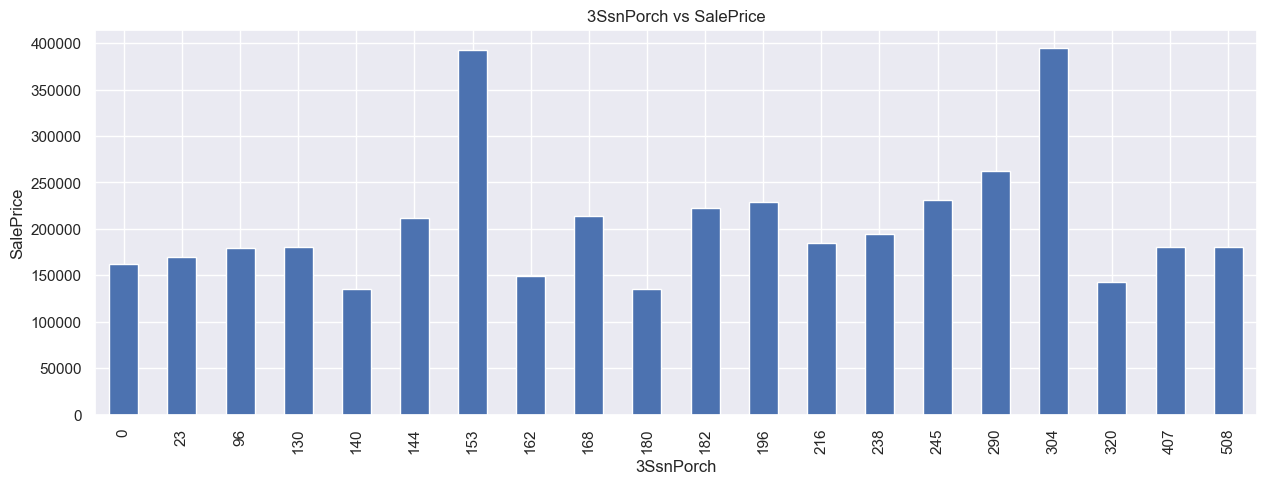

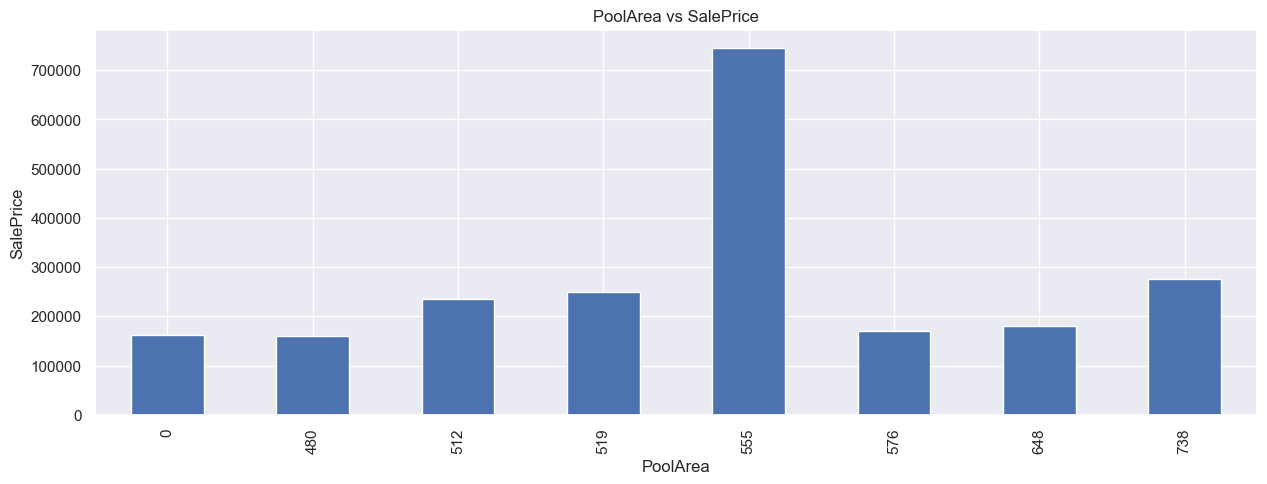

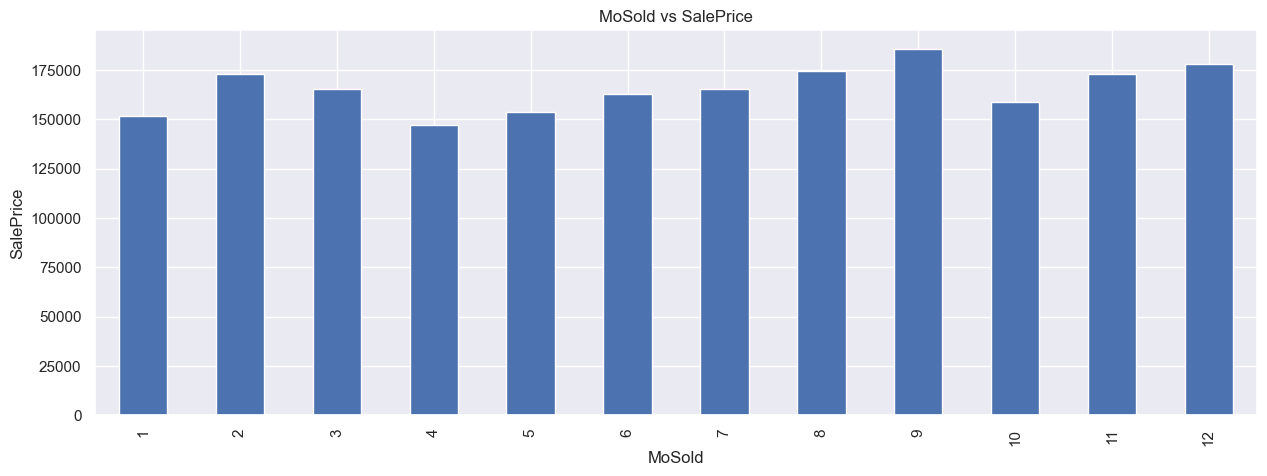

In [69]:

### Relationship between discrete feature and SalePrice
for feature in discrete_features:
 plt.figure(figsize=(15,5))
 dataset.groupby(feature)['SalePrice'].median().plot.bar()
 plt.xlabel(feature)
 plt.ylabel('SalePrice')
 plt.title("{} vs SalePrice".format(feature))
 plt.show();

#### Observations
    1. For MSSubClass, 2-STORY 1946 & NEWER has highest median value whereas PUD - MULTILEVEL - INCL 
       SPLIT LEV/FOYER has least. Median values for other categories is comparable
    2. For OverallQual, Very Excellent has highest median value whereas Very Poor has least.
    3. For OverallCond, Average has highest median value whereas Very Poor has least.
    4. For LowQualFinSF, 572 squarefeet has highest median value whereas 156 Squarefeet
    has least. Median values for other categories is comparable.
    5. For BsmtFullBath, 2 bathrooms has highest median value whereas Zero bathroom has
    least. Median values for other categories is comparable.
    6. For BsmtHalfBath, All categories has almost equal median.
    7. For FullBath, 3 bathrooms has highest median value whereas 1 bathroom has least.
    Median values for other categories is comparable.
    8. For HalfBath, 1 bathroom has highest median value whereas Zero bathroom has least.
    Median values for other categories is comparable.
    9. For BedroomAbvGr, 8 and zero bedrooms has highest median value whereas 2
    bedrooms has least. Median values for other categories is comparable.
    10. For KitchenAbvGr, 1 Kitchen has highest median value whereas 3 Kitchens has least.
    Median values for other categories is comparable.
    11. For TotRmsAbvGrd, 11 rooms has highest median value whereas 2 rooms has least.
    Median values for other categories is comparable.
    12. For Fireplaces, 2 and 3 fireplaces has highest median value whereas o fireplaces has
    least. Median values for other categories is comparable.
    13. For GarageCars, 3 car capacity has highest median value whereas Zero car capacity has
    least. Median values for other categories is comparable.
    14. For 3SsnPorch, 153 and 304 squarefeet has highest median value whereas 180
    squarefeet has least. Median values for other categories is comparable.
    15. For PoolArea, 555 squarefeet has highest median value whereas all other categories has
    alomst equal median values.
    16. For MoSold, all months have almost equal median value.


## 6.4 Relationship between continuous feature and saleprice


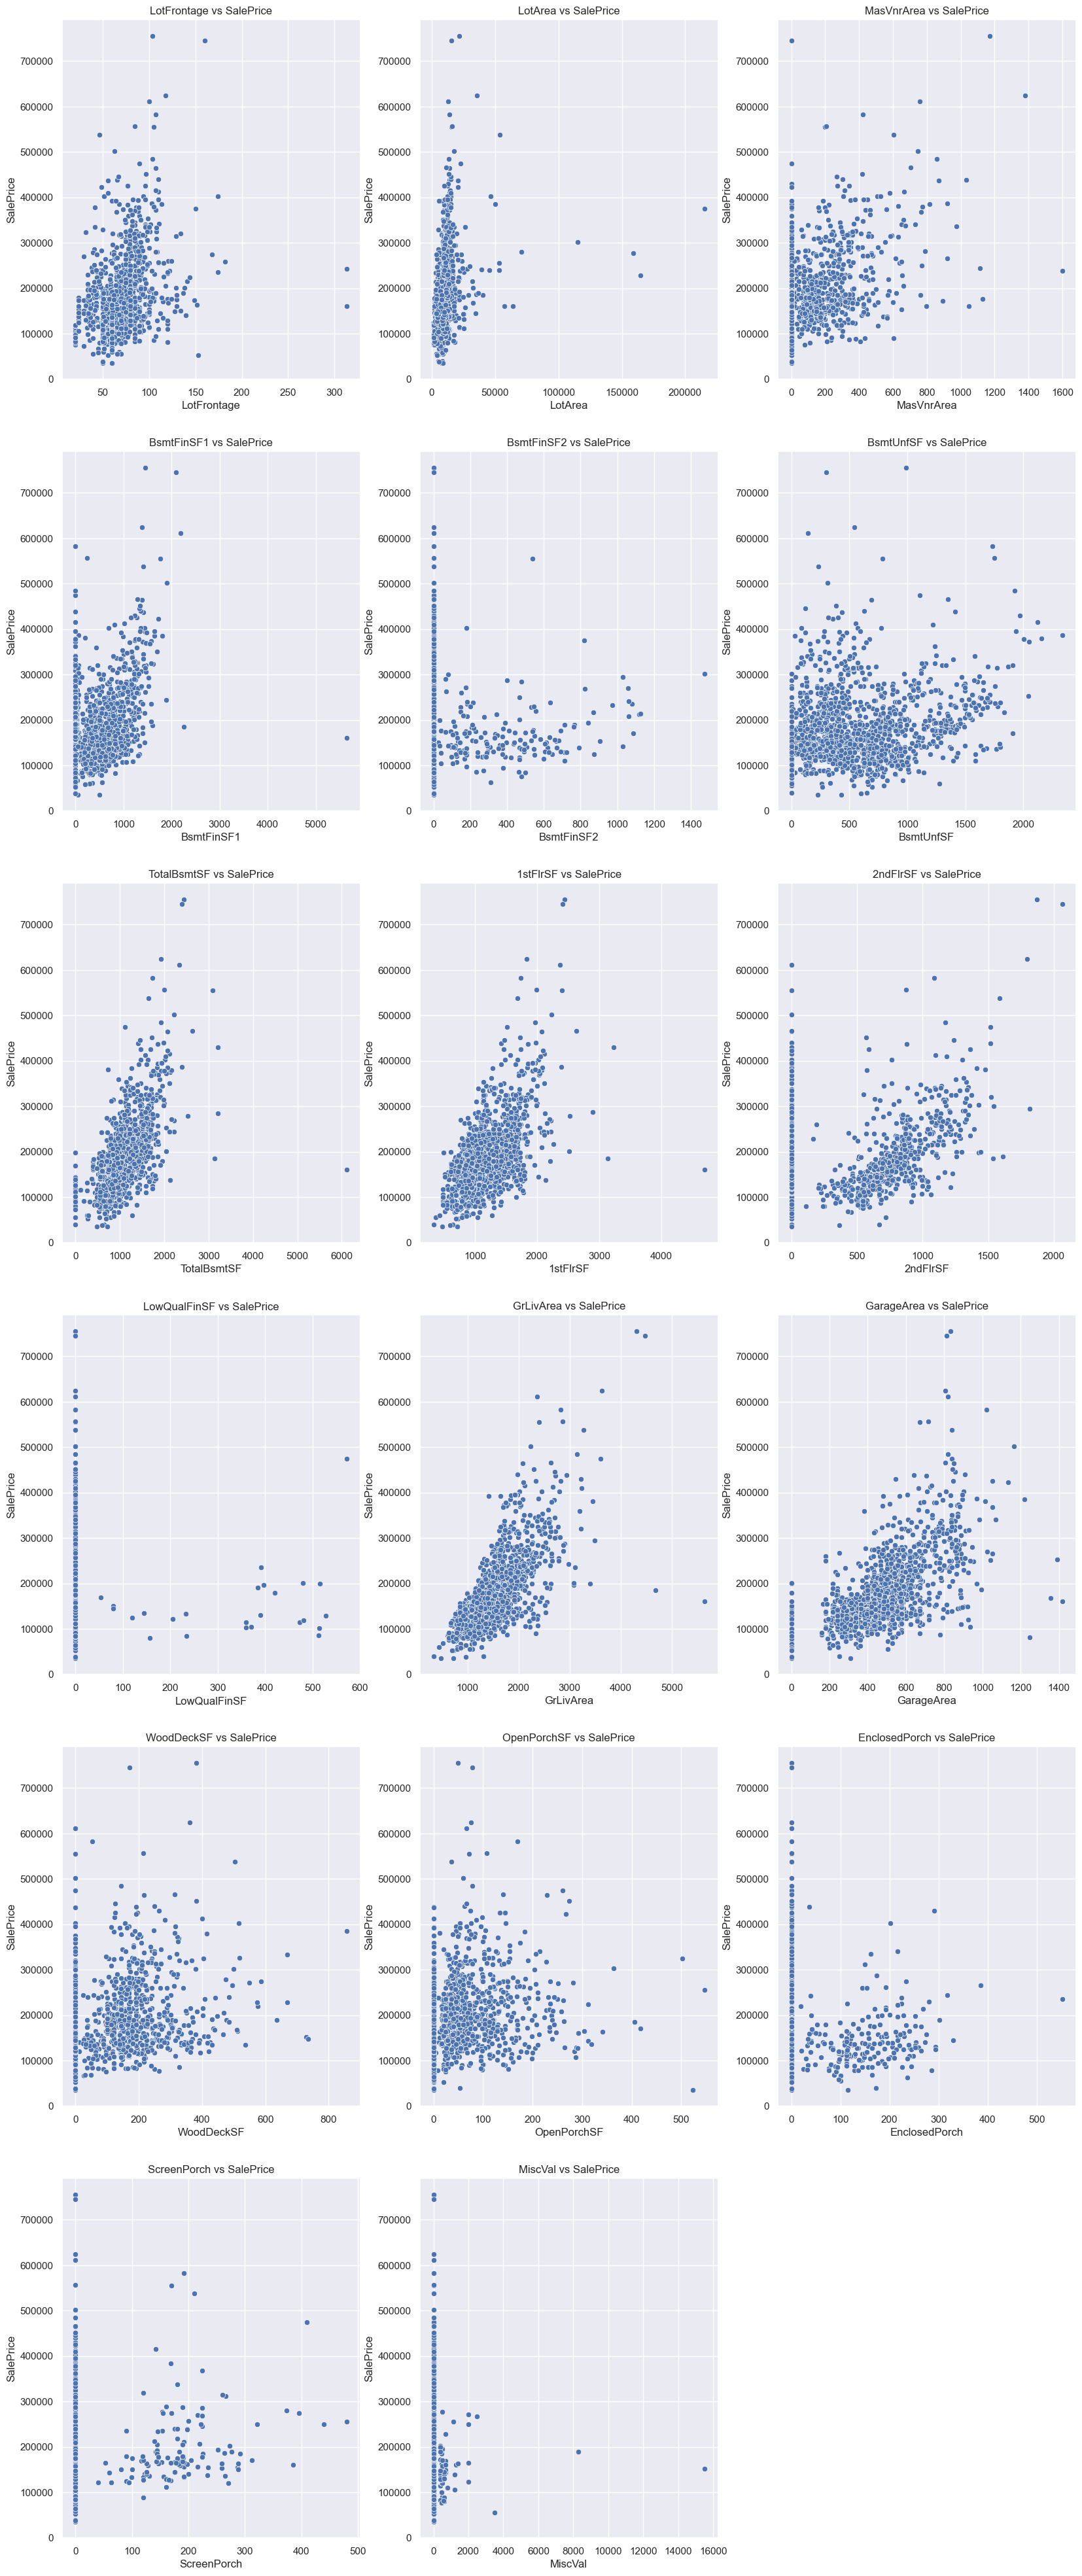

In [73]:
### Relationship between continuous feature and saleprice
plt.figure(figsize=(20,50))
for feature in enumerate(continuous_features):
 plt.subplot(6,3,feature[0]+1)
 sns.scatterplot(data=dataset, x=dataset[feature[1]], y=dataset['SalePrice'])
 plt.xlabel(feature[1])
 plt.ylabel('SalePrice')
 plt.title("{} vs SalePrice".format(feature[1]))


### 0bservations
    1. LotFrontage has most of values between 0 to 150 feet of street length and median
    value of SalePrice between 0 to 4 lakh.
    2. LotArea has most of the observations between 0 to 50K square feet lot Area and
    median value of SalePrice between 0 to 4 lakh.
    3. MasVnrArea has most of the observations between 0 to 400 square feet Masonry
    veneer area and median value of SalePrice between 0 to 4 lakh.
    4. BsmtFinSF1 has most of the observations between 0 to 1500 square feet Type 1 finished
    basement area and median value of SalePrice between 0 to 3 lakh.
    5. BsmtFinSF2 has most of the observations as 0 square feet Type 2 finished basement
    area and median value of SalePrice between 0 to 2 lakh.
    6. BsmtUnfSF has most of the observations between 0 to 1500 square feet Total basement
    area and median value of SalePrice between 0 to 3 lakh.
    7. TotalBsmtSF has most of the observations between 0 to 2000 square feet basement
    unfinished area and median value of SalePrice between 0 to 3 lakh.
    8. 1stFlrSF has most of the observations between 0 to 2000 square feet First floor surface
    area and median value of SalePrice between 0 to 4 lakh.
    9. 2ndFlrSF has most of the observations between 0 to 1500 square feet Second floor
    surface area and median value of SalePrice between 0 to 3 lakh.
    10. GrLivArea has most of the observations between 500 to 3000 square feet above ground
    living area and median value of SalePrice between 0 to 4 lakh.
    11. GarageArea has most of the observations between 200 to 900 square feet Garage area
    and median value of SalePrice between 0 to 4 lakh.
    12. WoodDeckSF has most of the observations between 0 to 400 square feet Wooddeck
    area and median value of SalePrice between 0 to 4 lakh.
    13. OpenPorchSF has most of the observations between 0 to 200 square feet Open porch
    area and median value of SalePrice between 0 to 4 lakh.
    14. EnclosedPorch has most of the observations between 0 to 300 square feet Enclosed
    porch area and median value of SalePrice between 0 to 2 lakh.
    15. ScreenPorch has most of the observations between 0 to 300 square feet Screen porch
    area and median value of SalePrice between 0 to 3 lakh.


## 7.0 Outliers

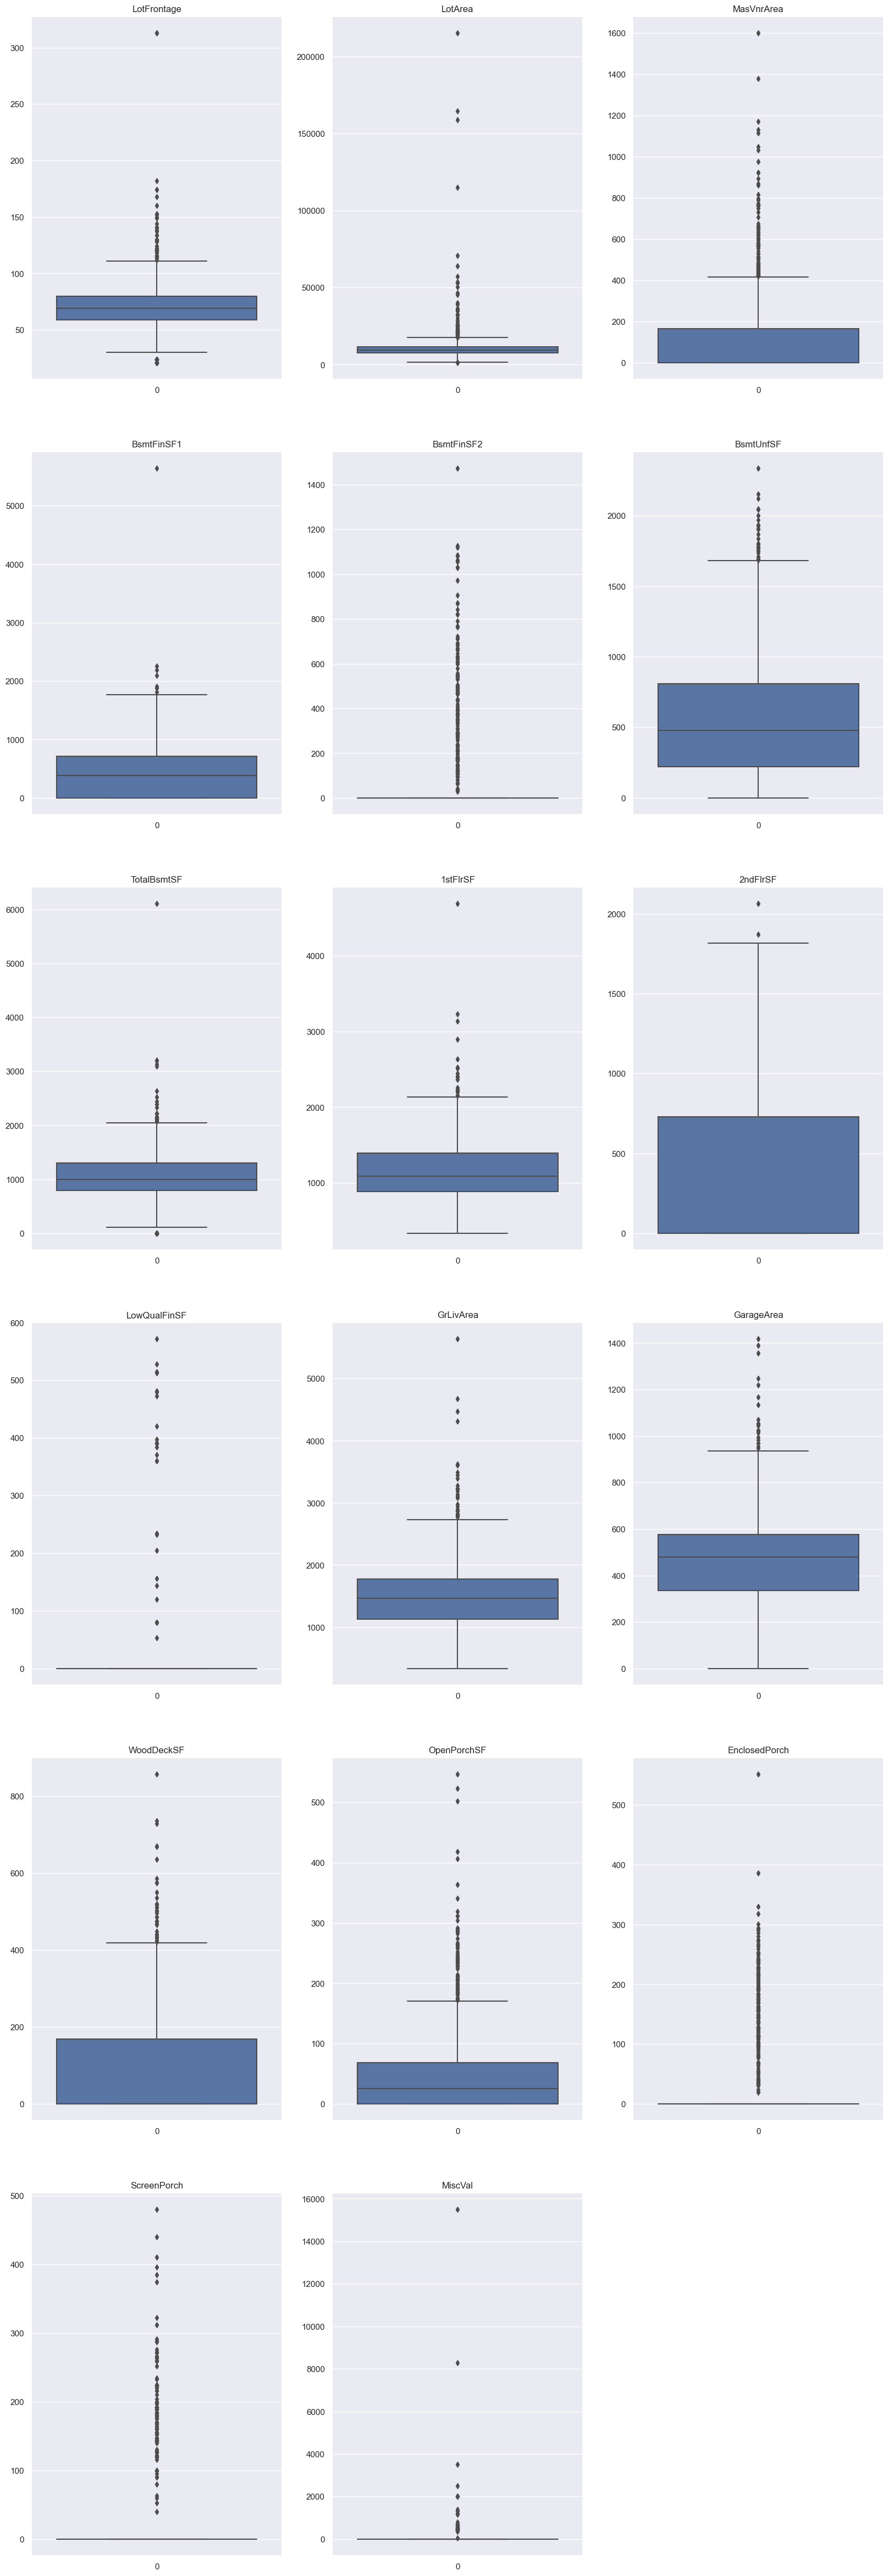

In [79]:
### getting outliers
plt.figure(figsize=(20,60))
for feature in enumerate( continuous_features):
 plt.subplot(6,3,feature[0]+1)
 sns.boxplot(data=dataset[feature[1]])
 plt.title(feature[1])

### Observations
    1. LotFrontage, LotArea and TotalBsmtSF has outliers below lower boundary and above
    upper boundary.
    2. MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea,
    WoodDeckSF and OpenPorchSF has outliers above upper boundary.
    3. BsmtFinSF2, EnclosedPorch and ScreenPorch have majority of values as outliers and
    those outliers are above upper boundary.

# 8.0 Correlation between Numerical features and SalesPrice and Visualisation.

## 8.1 Discrete features vs SalePrice

In [80]:
corr_discreate=round(dataset[discrete_features+['SalePrice']].corr(),2)
corr_discreate

MSSubClass  OverallQual  OverallCond  BsmtFullBath  \
MSSubClass          1.00         0.03        -0.06          0.00   
OverallQual         0.03         1.00        -0.09          0.11   
OverallCond        -0.06        -0.09         1.00         -0.05   
BsmtFullBath        0.00         0.11        -0.05          1.00   
BsmtHalfBath       -0.00        -0.04         0.12         -0.15   
FullBath            0.13         0.55        -0.19         -0.06   
HalfBath            0.18         0.27        -0.06         -0.03   
BedroomAbvGr       -0.02         0.10         0.01         -0.15   
KitchenAbvGr        0.28        -0.18        -0.09         -0.04   
TotRmsAbvGrd        0.04         0.43        -0.06         -0.05   
Fireplaces         -0.05         0.40        -0.02          0.14   
GarageCars         -0.04         0.60        -0.19          0.13   
3SsnPorch          -0.04         0.03         0.03         -0.00   
PoolArea            0.01         0.07        -0.00          0.07   
MoSold             -0.01         0.07        -0.00         -0.03   
SalePrice          -0.08         0.79        -0.08          0.23   

              BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
MSSubClass           -0.00      0.13      0.18         -0.02          0.28   
OverallQual          -0.04      0.55      0.27          0.10         -0.18   
OverallCond           0.12     -0.19     -0.06          0.01         -0.09   
BsmtFullBath         -0.15     -0.06     -0.03         -0.15         -0.04   
BsmtHalfBath          1.00     -0.05     -0.01          0.05         -0.04   
FullBath             -0.05      1.00      0.14          0.36          0.13   
HalfBath             -0.01      0.14      1.00          0.23         -0.07   
BedroomAbvGr          0.05      0.36      0.23          1.00          0.20   
KitchenAbvGr         -0.04      0.13     -0.07          0.20          1.00   
TotRmsAbvGrd         -0.02      0.55      0.34          0.68          0.26   
Fireplaces            0.03      0.24      0.20          0.11         -0.12   
GarageCars           -0.02      0.47      0.22          0.09         -0.05   
3SsnPorch             0.04      0.04     -0.00         -0.02         -0.02   
PoolArea              0.02      0.05      0.02          0.07         -0.01   
MoSold                0.03      0.06     -0.01          0.05          0.03   
SalePrice            -0.02      0.56      0.28          0.17         -0.14   

              TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  \
MSSubClass            0.04       -0.05       -0.04      -0.04      0.01   
OverallQual           0.43        0.40        0.60       0.03      0.07   
OverallCond          -0.06       -0.02       -0.19       0.03     -0.00   
BsmtFullBath         -0.05        0.14        0.13      -0.00      0.07   
BsmtHalfBath         -0.02        0.03       -0.02       0.04      0.02   
FullBath              0.55        0.24        0.47       0.04      0.05   
HalfBath              0.34        0.20        0.22      -0.00      0.02   
BedroomAbvGr          0.68        0.11        0.09      -0.02      0.07   
KitchenAbvGr          0.26       -0.12       -0.05      -0.02     -0.01   
TotRmsAbvGrd          1.00        0.33        0.36      -0.01      0.08   
Fireplaces            0.33        1.00        0.30       0.01      0.10   
GarageCars            0.36        0.30        1.00       0.04      0.02   
3SsnPorch            -0.01        0.01        0.04       1.00     -0.01   
PoolArea              0.08        0.10        0.02      -0.01      1.00   
MoSold                0.04        0.05        0.04       0.03     -0.03   
SalePrice             0.53        0.47        0.64       0.04      0.09   

              MoSold  SalePrice  
MSSubClass     -0.01      -0.08  
OverallQual     0.07       0.79  
OverallCond    -0.00      -0.08  
BsmtFullBath   -0.03       0.23  
BsmtHalfBath    0.03      -0.02  
FullBath        0.06       0.56  
HalfBath       -

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'MSSubClass'),
  Text(1.5, 0, 'OverallQual'),
  Text(2.5, 0, 'OverallCond'),
  Text(3.5, 0, 'BsmtFullBath'),
  Text(4.5, 0, 'BsmtHalfBath'),
  Text(5.5, 0, 'FullBath'),
  Text(6.5, 0, 'HalfBath'),
  Text(7.5, 0, 'BedroomAbvGr'),
  Text(8.5, 0, 'KitchenAbvGr'),
  Text(9.5, 0, 'TotRmsAbvGrd'),
  Text(10.5, 0, 'Fireplaces'),
  Text(11.5, 0, 'GarageCars'),
  Text(12.5, 0, '3SsnPorch'),
  Text(13.5, 0, 'PoolArea'),
  Text(14.5, 0, 'MoSold'),
  Text(15.5, 0, 'SalePrice')])

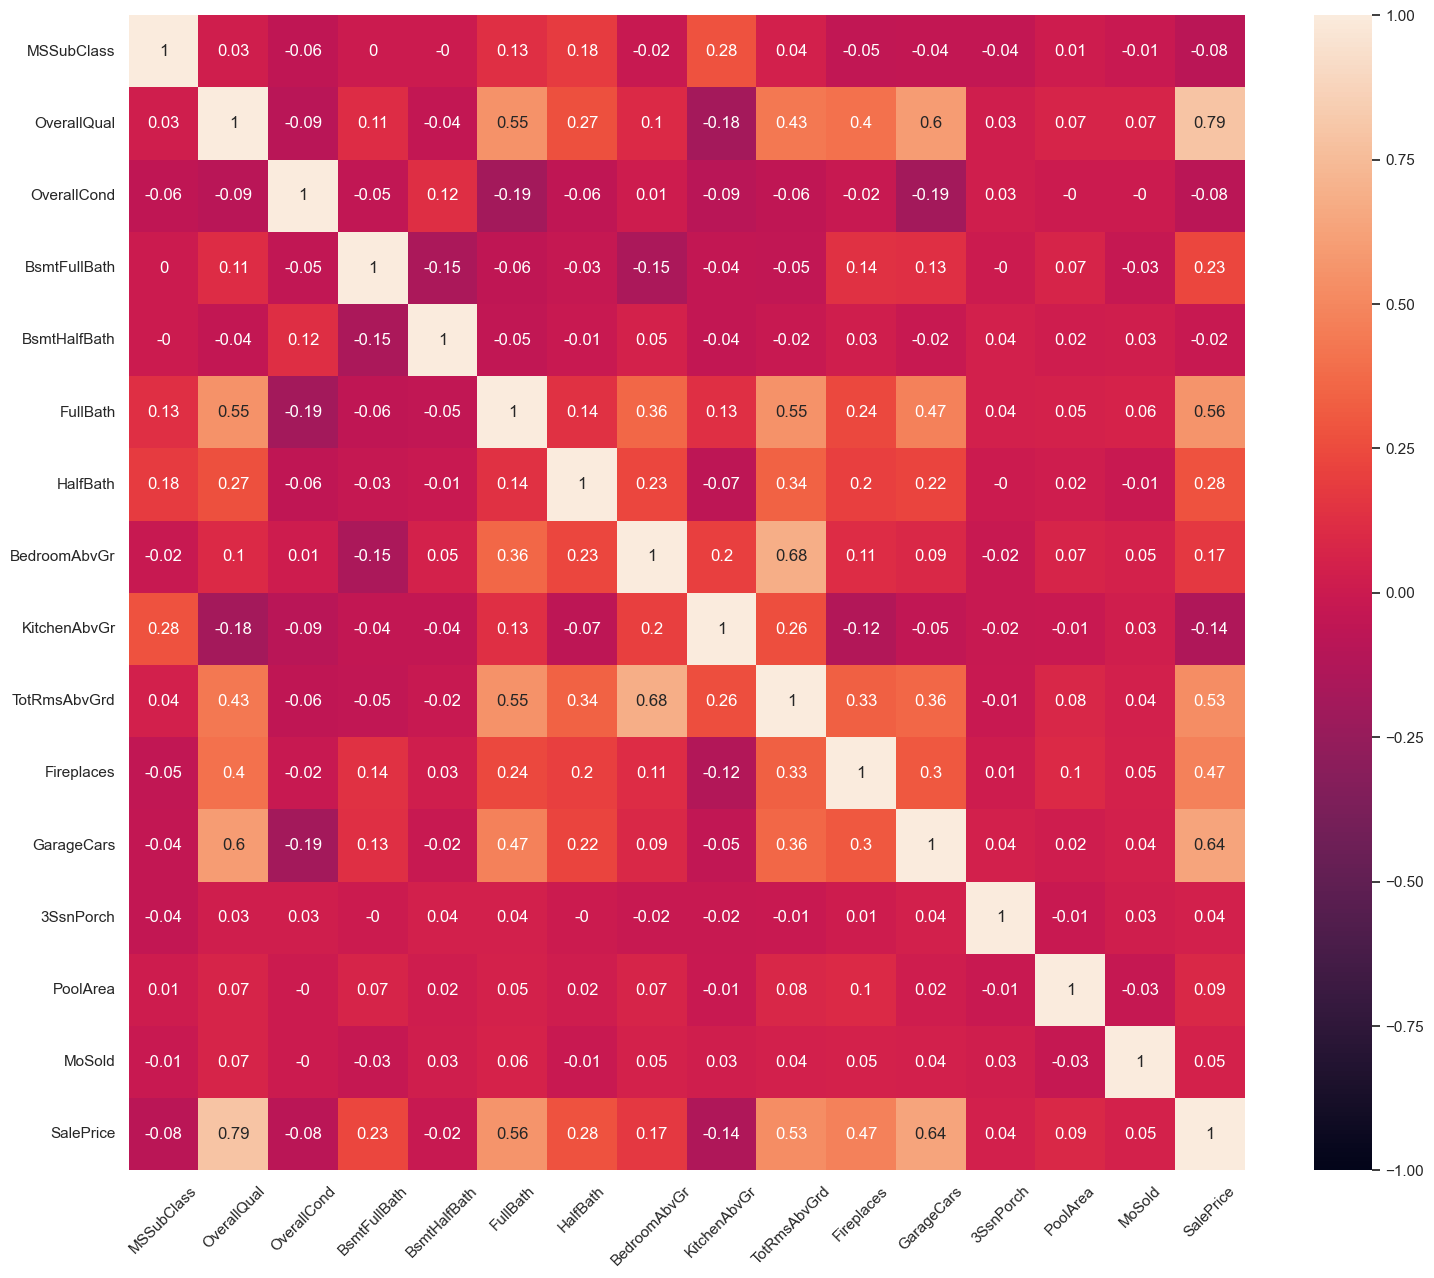

In [82]:
plt.figure(figsize=(18,15))
sns.heatmap(data=corr_discreate,annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45)

## Note (For both positive and negative side)
1. Correlation coefficients between 0.9 and 1.0, very highly correlated.
2. Correlation coefficients between 0.7 and 0.9, highly correlated.
3. Correlation coefficients between 0.5 and 0.7, moderately correlated.
4. Correlation coefficients between 0.3 and 0.5, low correlation.
5. Correlation coefficients less than 0.3, little correlation.
## Observations Target_feature = SalePrice
1. OverallQual is highly correlated with SalePrice.
2. FullBath, TotRmsAbvGrd and GarageCars is moderately correlated with SalePrice.
3. Fireplaces has low correlation with SalePrice.
4. MSSubClass, OverallCond, LowQualFinSF, BsmtFullBath, BsmtHalfBath, HalfBath,
    BedroomAbvGr, KitchenAbvGr, 3SsnPorch, PoolArea, MiscVal and MoSold has little
    correlation with SalePrice.

### Checking Multicollinearity
   1. No independent features have Correlation value greater than 0.7.

## 8.2 Continuous features vs SalePrice

In [84]:
corr_continuous=round(dataset[continuous_features+['SalePrice']].corr(),2)
corr_continuous

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage           1.00     0.43        0.19        0.23        0.05   
LotArea               0.43     1.00        0.10        0.21        0.11   
MasVnrArea            0.19     0.10        1.00        0.26       -0.07   
BsmtFinSF1            0.23     0.21        0.26        1.00       -0.05   
BsmtFinSF2            0.05     0.11       -0.07       -0.05        1.00   
BsmtUnfSF             0.13    -0.00        0.11       -0.50       -0.21   
TotalBsmtSF           0.39     0.26        0.36        0.52        0.10   
1stFlrSF              0.46     0.30        0.34        0.45        0.10   
2ndFlrSF              0.08     0.05        0.17       -0.14       -0.10   
LowQualFinSF          0.04     0.00       -0.07       -0.06        0.01   
GrLivArea             0.40     0.26        0.39        0.21       -0.01   
GarageArea            0.34     0.18        0.37        0.30       -0.02   
WoodDeckSF            0.09     0.17        0.16        0.20        0.07   
OpenPorchSF           0.15     0.08        0.13        0.11        0.00   
EnclosedPorch         0.01    -0.02       -0.11       -0.10        0.04   
ScreenPorch           0.04     0.04        0.06        0.06        0.09   
MiscVal               0.00     0.04       -0.03        0.00        0.00   
SalePrice             0.35     0.26        0.48        0.39       -0.01   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage         0.13         0.39      0.46      0.08          0.04   
LotArea            -0.00         0.26      0.30      0.05          0.00   
MasVnrArea          0.11         0.36      0.34      0.17         -0.07   
BsmtFinSF1         -0.50         0.52      0.45     -0.14         -0.06   
BsmtFinSF2         -0.21         0.10      0.10     -0.10          0.01   
BsmtUnfSF           1.00         0.42      0.32      0.00          0.03   
TotalBsmtSF         0.42         1.00      0.82     -0.17         -0.03   
1stFlrSF            0.32         0.82      1.00     -0.20         -0.01   
2ndFlrSF            0.00        -0.17     -0.20      1.00          0.06   
LowQualFinSF        0.03        -0.03     -0.01      0.06          1.00   
GrLivArea           0.24         0.45      0.57      0.69          0.13   
GarageArea          0.18         0.49      0.49      0.14         -0.07   
WoodDeckSF         -0.01         0.23      0.24      0.09         -0.03   
OpenPorchSF         0.13         0.25      0.21      0.21          0.02   
EnclosedPorch      -0.00        -0.10     -0.07      0.06          0.06   
ScreenPorch        -0.01         0.08      0.09      0.04          0.03   
MiscVal            -0.02        -0.02     -0.02      0.02         -0.00   
SalePrice           0.21         0.61      0.61      0.32         -0.03   

               GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
LotFrontage         0.40        0.34        0.09         0.15           0.01   
LotArea             0.26        0.18        0.17         0.08          -0.02   
MasVnrArea          0.39        0.37        0.16         0.13          -0.11   
BsmtFinSF1          0.21        0.30        0.20         0.11          -0.10   
BsmtFinSF2         -0.01       -0.02        0.07         0.00           0.04   
BsmtUnfSF           0.24        0.18       -0.01         0.13          -0.00   
TotalBsmtSF         0.45        0.49        0.23         0.25          -0.10   
1stFlrSF            0.57        0.49        0.24         0.21          -0.07   
2ndFlrSF            0.69        0.14        0.09         0.21           0.06   
LowQualFinSF        0.13       -0.07       -0.03         0.02           0.06   
GrLivArea           1.00        0.47        0.25         0.33           0.01   
GarageArea          0.47        1.00        0.22         0.24          -0.12   
WoodDeckSF          0.25        0.22        1.00         0.06          -0.13   
OpenPorchSF         0.33        0.24       

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'LotFrontage'),
  Text(1.5, 0, 'LotArea'),
  Text(2.5, 0, 'MasVnrArea'),
  Text(3.5, 0, 'BsmtFinSF1'),
  Text(4.5, 0, 'BsmtFinSF2'),
  Text(5.5, 0, 'BsmtUnfSF'),
  Text(6.5, 0, 'TotalBsmtSF'),
  Text(7.5, 0, '1stFlrSF'),
  Text(8.5, 0, '2ndFlrSF'),
  Text(9.5, 0, 'LowQualFinSF'),
  Text(10.5, 0, 'GrLivArea'),
  Text(11.5, 0, 'GarageArea'),
  Text(12.5, 0, 'WoodDeckSF'),
  Text(13.5, 0, 'OpenPorchSF'),
  Text(14.5, 0, 'EnclosedPorch'),
  Text(15.5, 0, 'ScreenPorch'),
  Text(16.5, 0, 'MiscVal'),
  Text(17.5, 0, 'SalePrice')])

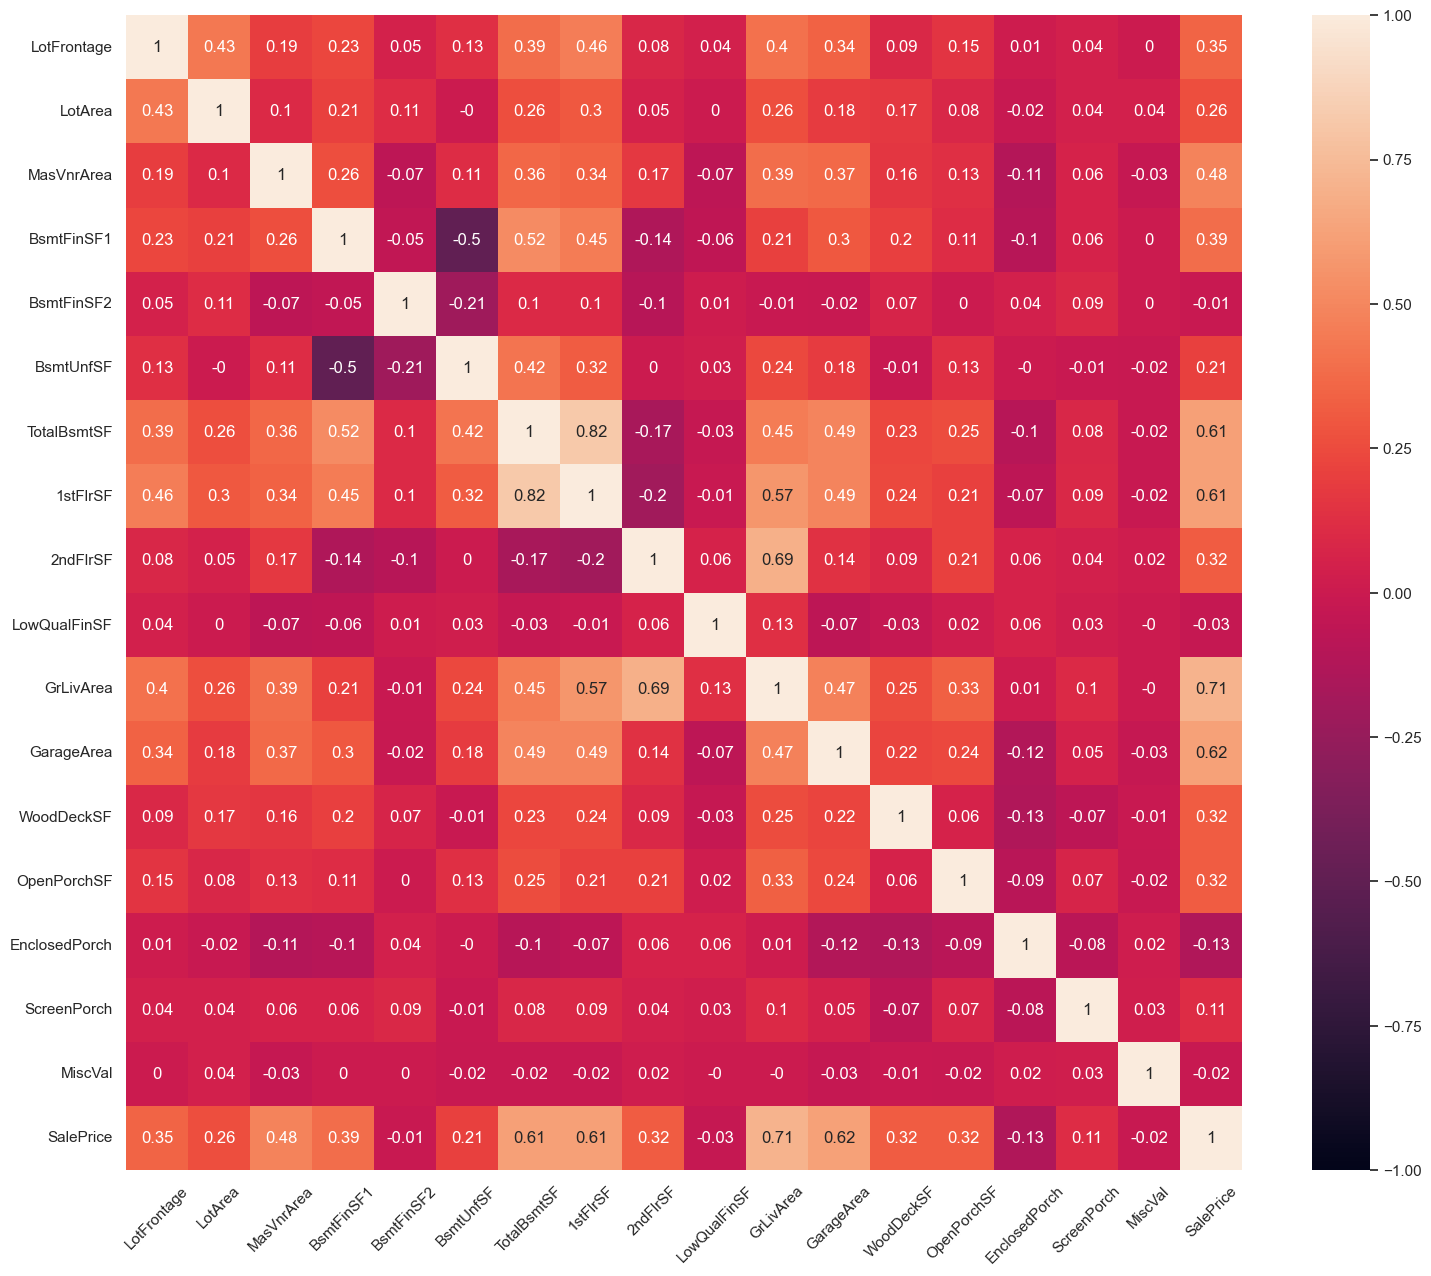

In [85]:
plt.figure(figsize=(18,15))
sns.heatmap(data=corr_continuous,annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45)

### Note (For both positive and negative side)
1. Correlation coefficients between 0.9 and 1.0, very highly correlated.
2. Correlation coefficients between 0.7 and 0.9, highly correlated.
3. Correlation coefficients between 0.5 and 0.7, moderately correlated.
4. Correlation coefficients between 0.3 and 0.5, low correlation.
5. Correlation coefficients less than 0.3, little correlation.
### Observations Target_feature = SalePrice
1. GrLivArea is highly correlated with SalePrice.
2. TotalBsmtSF, 1stFlrSF and GarageArea is moderately correlated with SalePrice.
3. BsmtFinSF1, 2ndFlrSF, WoodDeckSF and OpenPorchSF has low correlation with SalePrice.
4. LotArea, BsmtFinSF2, BsmtUnfSF, EnclosedPorch and ScreenPorch has little correlation with SalePrice.
### Checking Multicollinearity
1. 1stFlrSF and TotalBsmtSF are highly correlated.
2. All remaining features have correlation less than 0.7 with each other.

# 9.0 Temporal Features

In [86]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

## 9.1 YrSold Vs SalePrice

Text(0, 0.5, 'SalePrice')

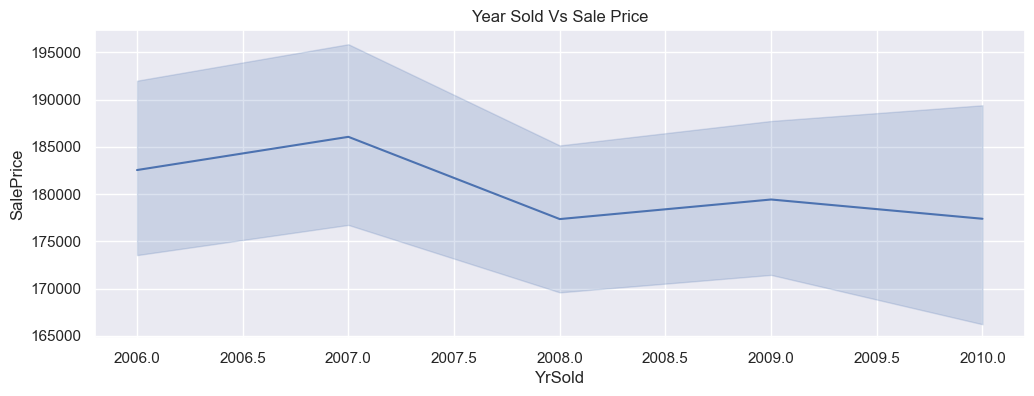

In [89]:
plt.figure(figsize=(12,4))
plt.title("Year Sold Vs Sale Price")
sns.lineplot(data=dataset,x='YrSold', y='SalePrice', estimator='mean')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

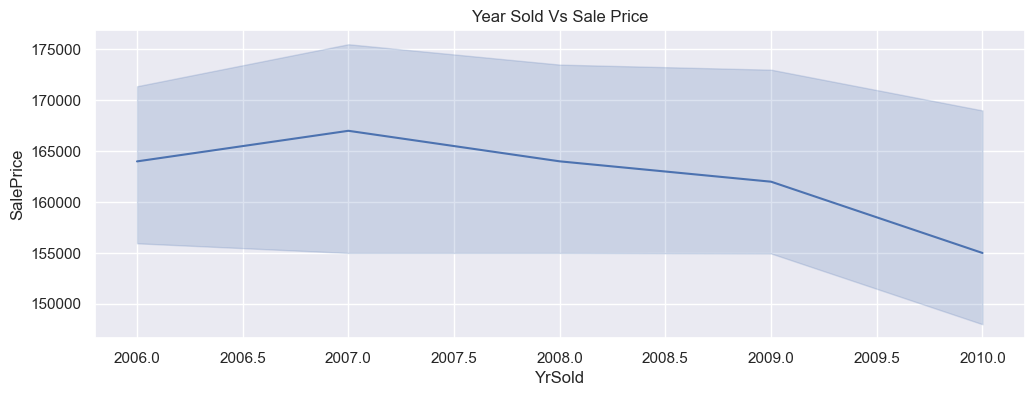

In [91]:
plt.figure(figsize=(12,4))
plt.title("Year Sold Vs Sale Price")
sns.lineplot(data=dataset,x='YrSold', y='SalePrice', estimator=np.median)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

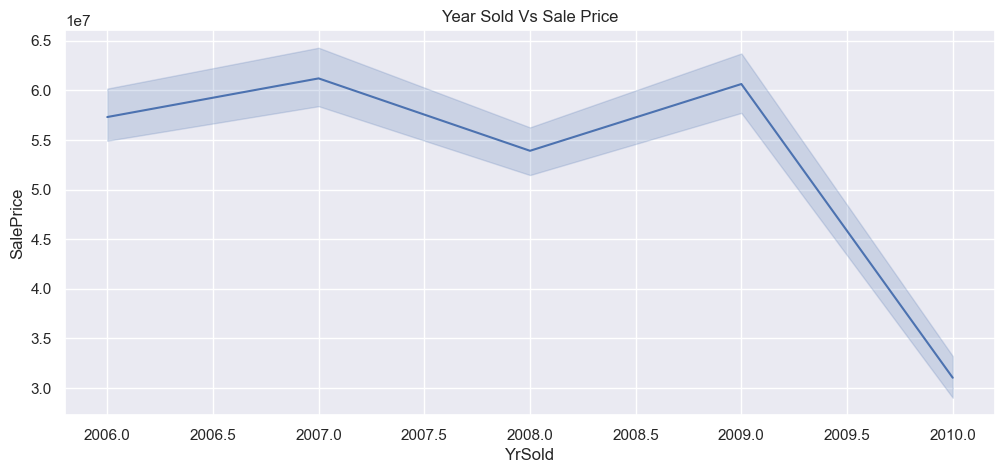

In [92]:
plt.figure(figsize=(12,5))
plt.title("Year Sold Vs Sale Price")
sns.lineplot(data=dataset,x='YrSold', y='SalePrice', estimator='sum')
plt.xlabel('YrSold')
plt.ylabel('SalePrice')

### Observation
1. From first plot it is visible that average sales per year is on decline.
2. This can be confirmed from second graph.
3. From third graph, it is clearly visible that Total Sales is also on decline.


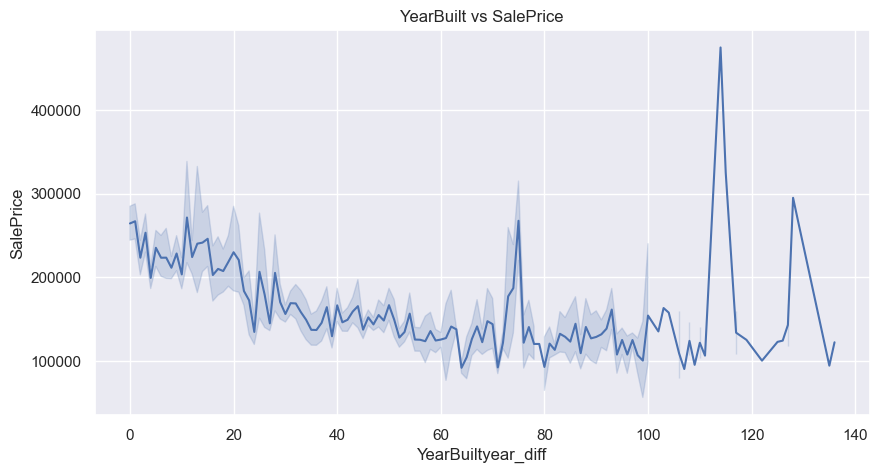

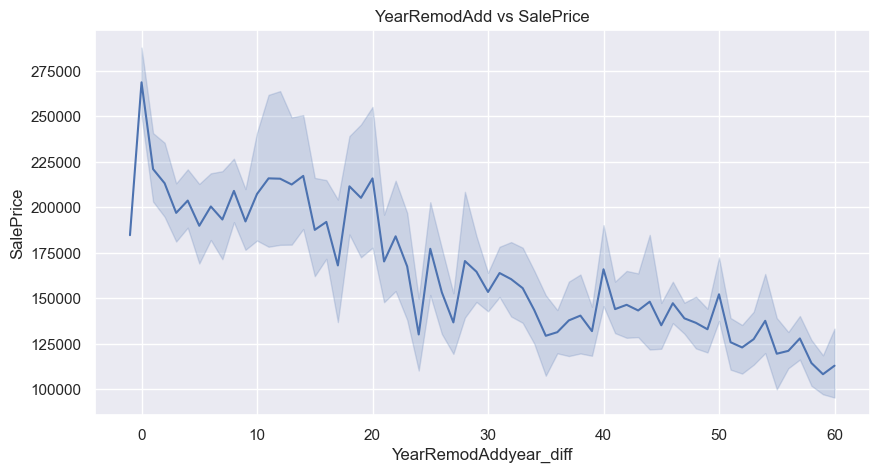

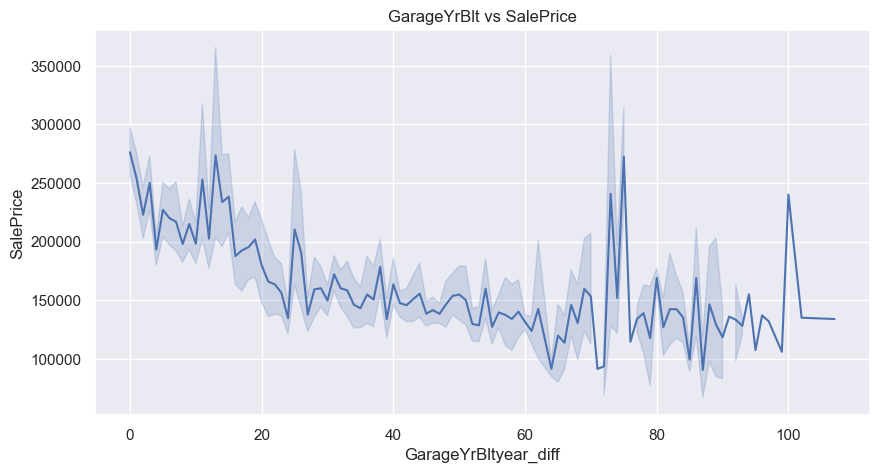

In [96]:
sns.set(rc={'figure.figsize':(10,5)})
data1 = dataset.copy()
for feature in year_feature:
     if feature!='YrSold':

         data1[feature+'year_diff']=data1['YrSold']-data1[feature]
         sns.lineplot(data=data1, x=data1[feature+'year_diff'], y='SalePrice')
         plt.title("{} vs SalePrice".format(feature))
         plt.show();

## Observations
    1. As the difference between YearBuilt and YrSold increases the SalePrice of house
    decreases.
    2. As the difference between YearRemodAdd and YrSold increases the SalePrice of house
    decreases.
    3. As the difference between GarageYrBlt and YrSold increases the SalePrice of house
    decreases